# Compare classification models (input vs. latent)
This notebook compares classification models trained with different parameters directly on spectra against classification models trained on latent encodings, the visualization is therefore divided by input vs. latent, and each factor of interest, e.g. max_num_peaks, etc.


In [35]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [36]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [37]:
df1 = load_experiment_sessions('MoNA', 'clf_spectrum_nextron', ['experiment01.csv'])
df2 = load_experiment_sessions('HMDB', 'clf_spectrum_nextron', ['experiment01.csv'])
df1.insert(6, 'clf_layer_config', '')
df1.insert(6, 'clf_input_columns', '')
df2.insert(6, 'clf_layer_config', '')
df2.insert(6, 'clf_input_columns', '')
df1['clf_layer_config'] = df1['layer_config']
df1['clf_input_columns'] = df1['input_columns']
df2['clf_layer_config'] = df2['layer_config']
df2['clf_input_columns'] = df2['input_columns']
df1 = df1.drop(['layer_config', 'input_columns'], axis=1)
df2 = df2.drop(['layer_config', 'input_columns'], axis=1)


df3 = load_experiment_sessions('MoNA', 'betavae_clf_latent_nextron', [
    'experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv'])
df3['target_column'] = df3['clf_target_column']
df3['target_column_id'] = df3['clf_target_column_id']
df3['param_n_classes'] = df3['param_clf_n_classes']
# df3.insert(7, 'betavae_layer_config', '')
# df3['betavae_layer_config'] = df3['layer_config']
# df3 = df3.drop(['param_clf_n_classes'], axis=1)

df4 = load_experiment_sessions('HMDB', 'betavae_clf_latent_nextron', ['experiment01.csv', 'experiment02.csv'])
df4['target_column'] = df4['clf_target_column']
df4['target_column_id'] = df4['clf_target_column_id']
df4['param_n_classes'] = df4['param_clf_n_classes']
# df4.insert(7, 'betavae_layer_config', '')
# df4['betavae_layer_config'] = df4['layer_config']
# df4 = df4.drop(['param_clf_n_classes'], axis=1)

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df = df.drop(['clf_target_column', 'clf_target_column_id', 'param_clf_n_classes'], axis=1)
df.to_csv(utils.get_project_path() / '.model' / 'classifier_trained_only_on_spectrum_or_latent.csv')
df

,name,target_column,target_column_id,dataset,full_model_name,clf_input_columns,clf_layer_config,class_subset,param_n_classes,param_dropout,...,m_valid_avg_per_chag,m_valid_avg_per_diff,m_test_cos_sim,m_test_eu_dist,m_test_per_chag,m_test_per_diff,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff
0,clf_spectrum,ionization_mode,ionization_mode_id,MoNA,clf_spectrum_100-66-25-1_01 (07-12-2021_23-30-29),['spectrum'],"[100, 66, 25]",[],2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clf_spectrum,instrument,instrument_id,MoNA,clf_spectrum_100-66-25-12_01 (07-12-2021_23-35...,['spectrum'],"[100, 66, 25]","[0, 129, 130, 155, 161, 133, 122, 157, 136, 11...",12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clf_spectrum,instrument_type,instrument_type_id,MoNA,clf_spectrum_100-66-25-7_01 (07-12-2021_23-39-18),['spectrum'],"[100, 66, 25]","[1, 0, 7, 2, 10, 17, 12]",7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clf_spectrum,precursor_type,precursor_type_id,MoNA,clf_spectrum_100-66-25-6_01 (07-12-2021_23-43-33),['spectrum'],"[100, 66, 25]","[2, 3, 4, 1, 0, 28]",6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clf_spectrum,kingdom,kingdom_id,MoNA,clf_spectrum_100-66-25-1_01 (07-12-2021_23-48-11),['spectrum'],"[100, 66, 25]",[],2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,betavae_clf_latent,class,class_id,HMDB,betavae_clf_latent_100-800-200-10-200-800-100_...,NaN,NaN,NaN,15,0.0,...,0.343616,0.338615,0.954683,0.268926,48986.074219,1.550753,0.826366,0.537422,92575.679688,0.770893
235,betavae_clf_latent,class,class_id,HMDB,betavae_clf_latent_100-800-200-10-200-800-100_...,NaN,NaN,NaN,15,0.0,...,0.343616,0.338615,0.927589,0.346559,54941.652344,1.543058,0.826366,0.537422,92575.679688,0.770893
236,betavae_clf_latent,class,class_id,HMDB,betavae_clf_latent_100-800-200-10-200-800-100_...,NaN,NaN,NaN,15,0.0,...,0.343616,0.338615,0.926936,0.323001,52808.265625,1.526722,0.826366,0.537422,92575.679688,0.770893
237,betavae_clf_latent,class,class_id,HMDB,betavae_clf_latent_100-800-200-20-200-800-100_...,NaN,NaN,NaN,15,0.0,...,0.343616,0.338615,0.952759,0.211838,20915.156250,1.429158,0.826366,0.537422,92575.679688,0.770893


In [38]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

## Scores input vs latent

In [39]:
clf_scores = ['m_train_accuracy_score', 'm_train_balanced_accuracy_score', 'm_train_recall_score_macro', 'm_train_precision_score_macro', 'm_train_f1_score_macro']

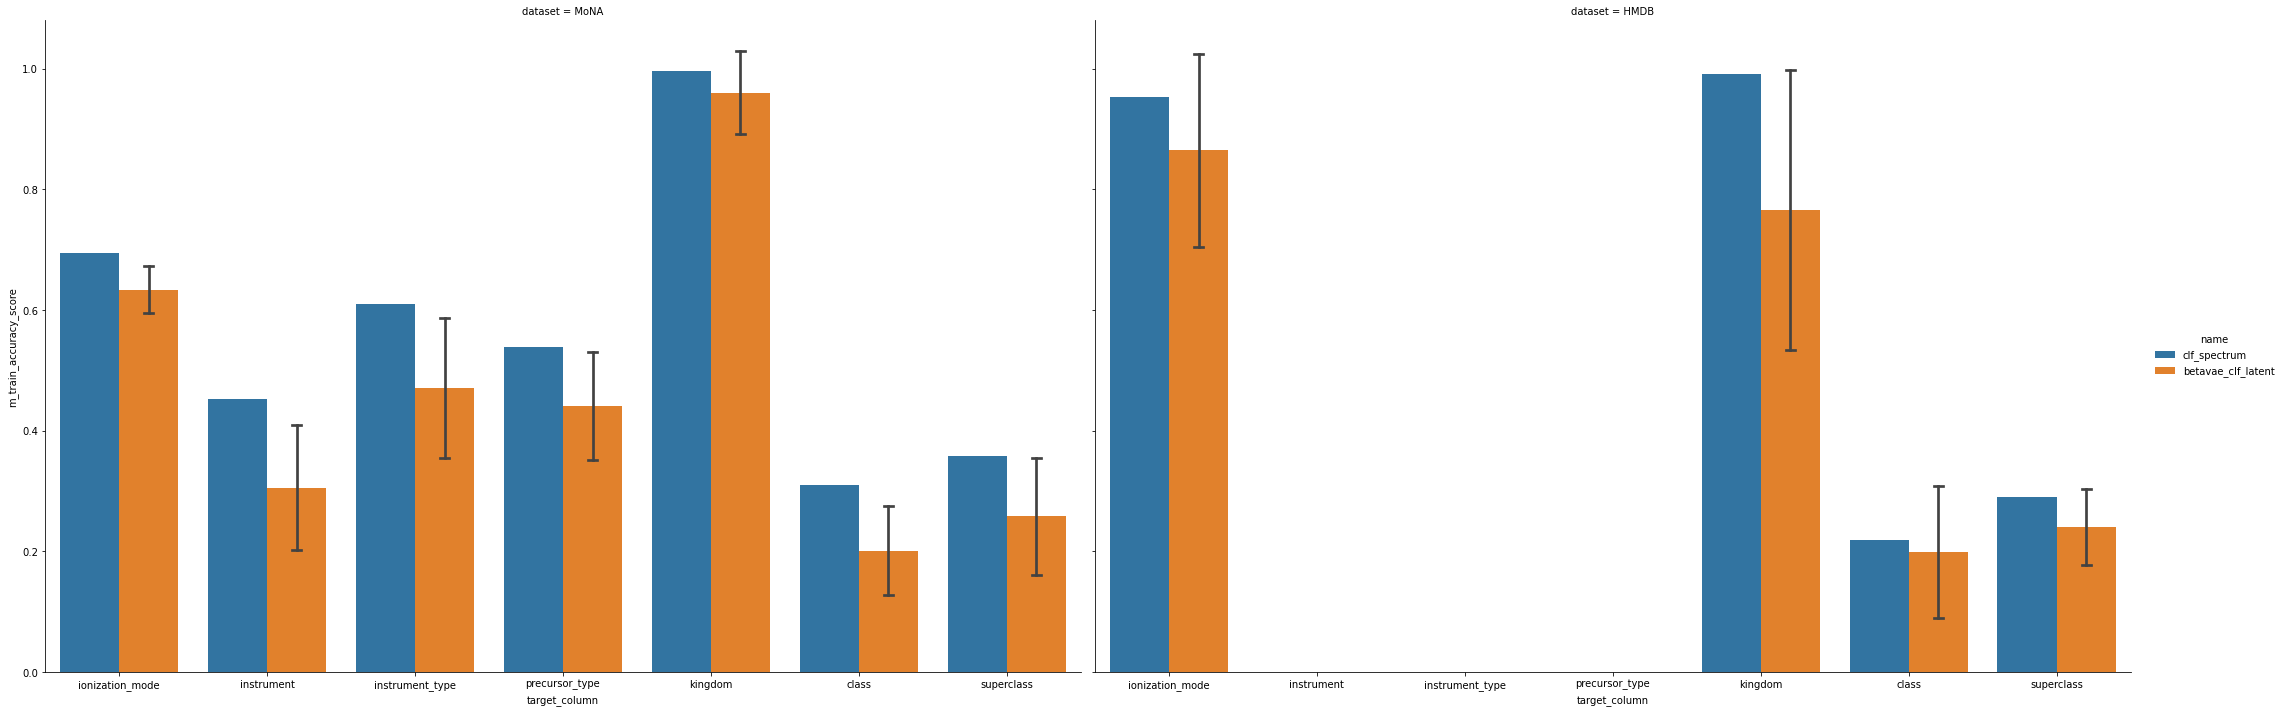

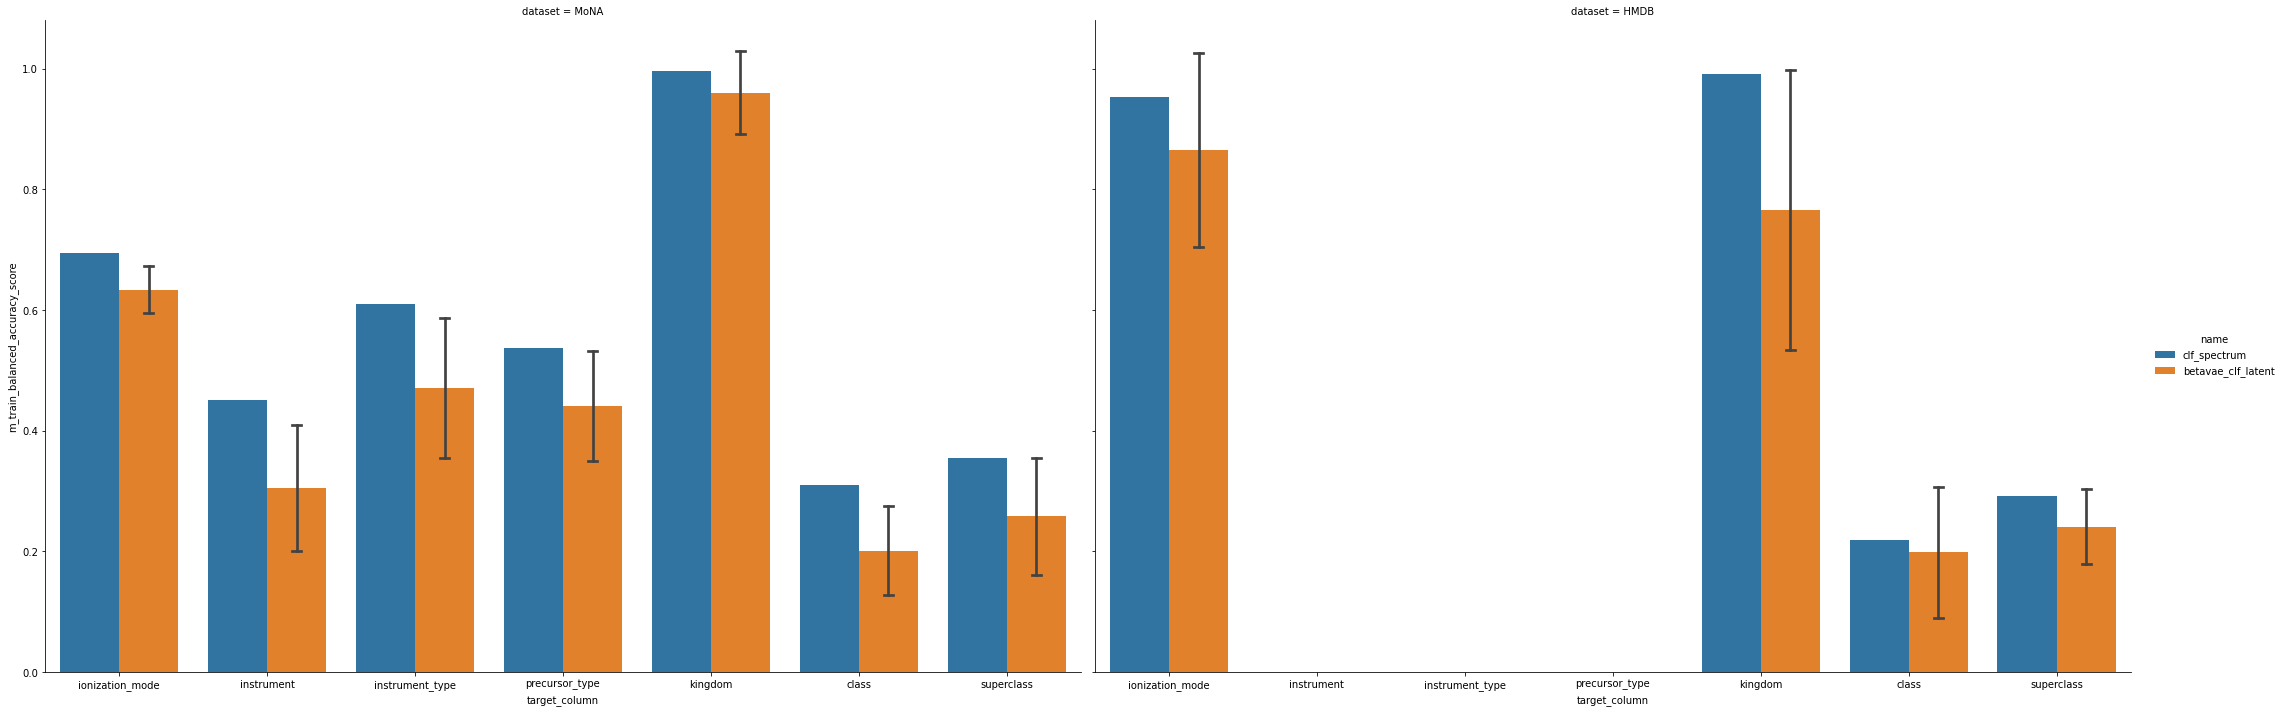

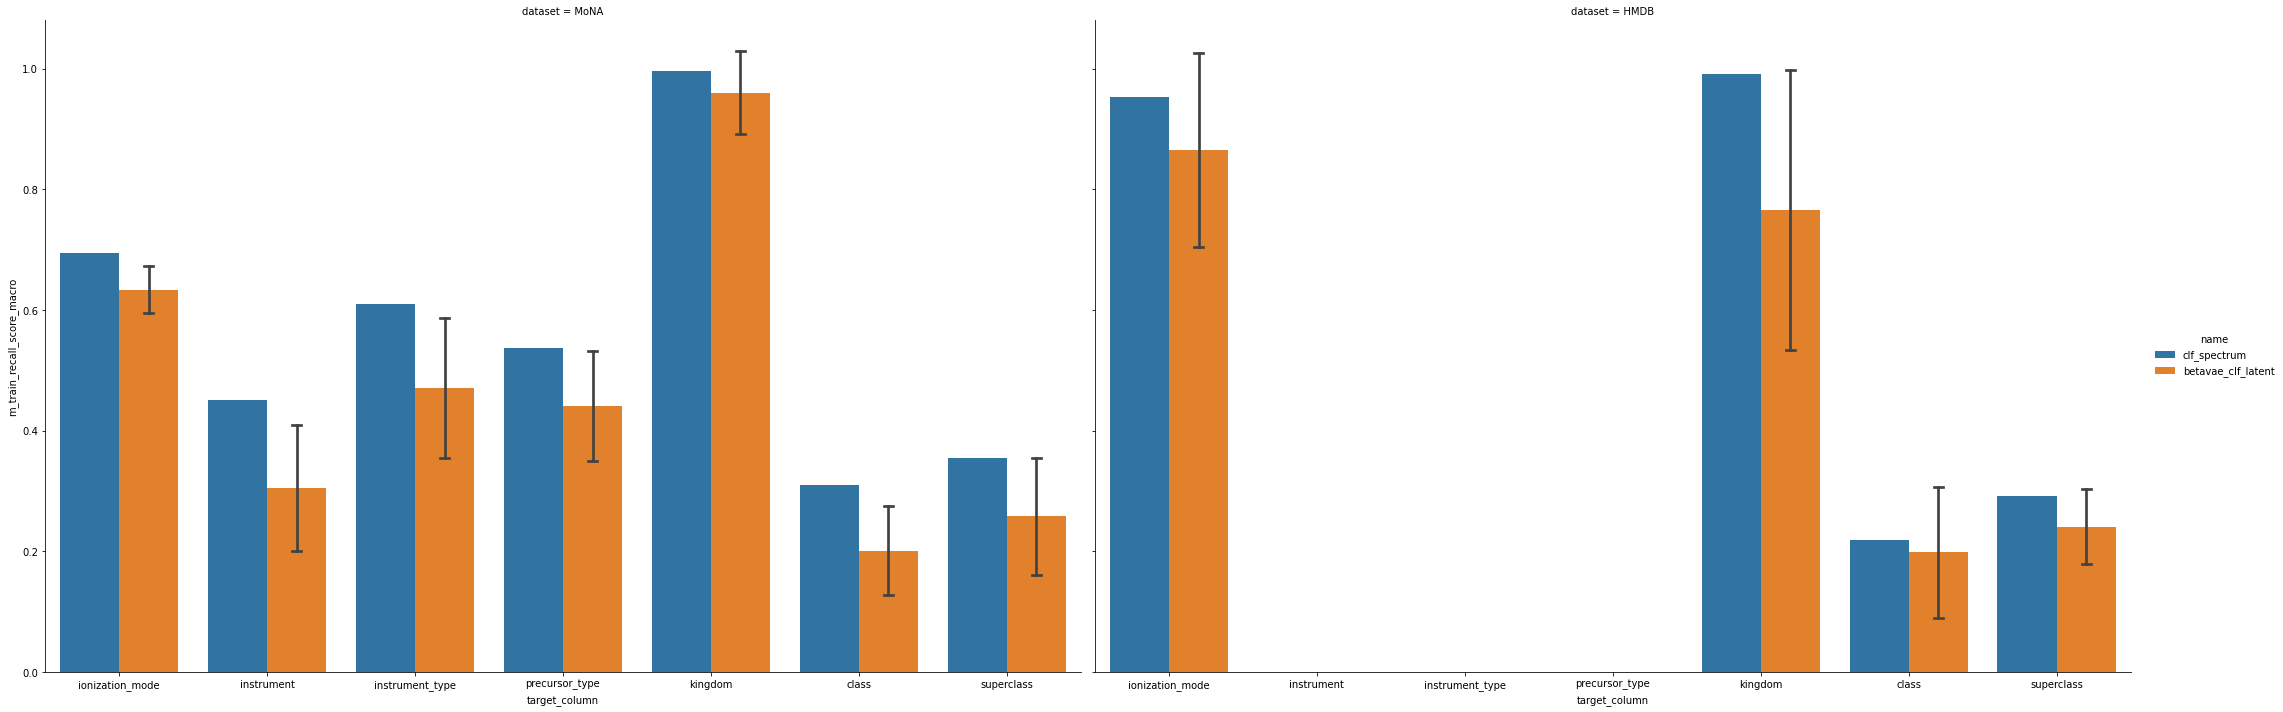

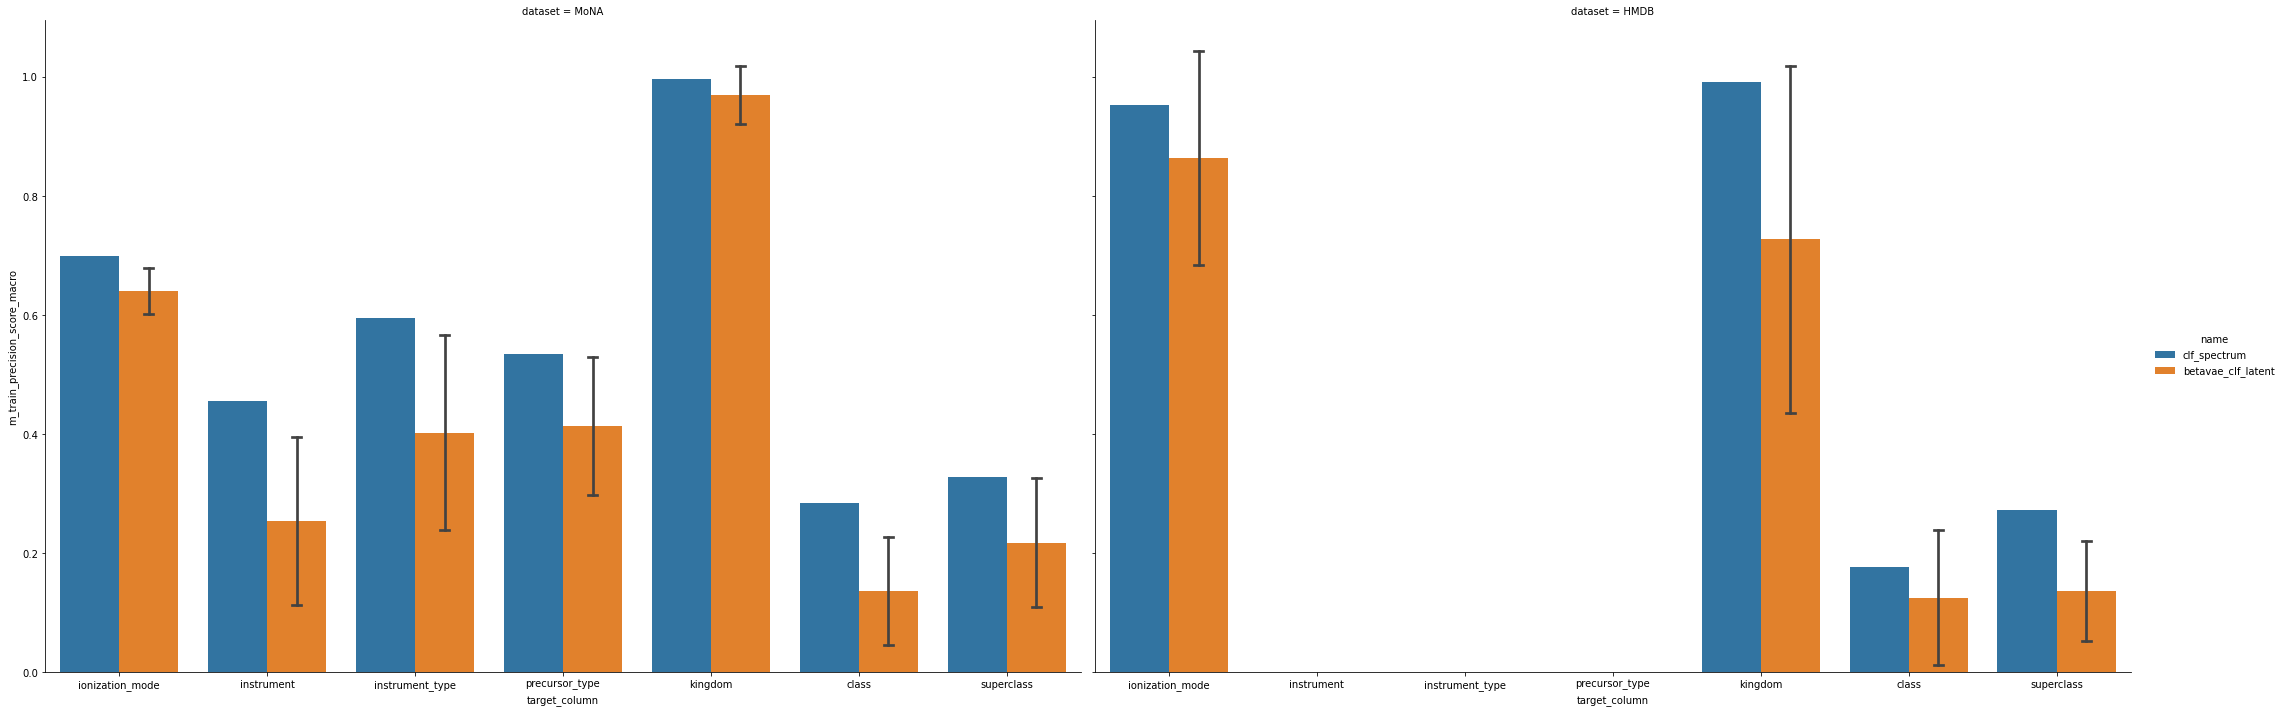

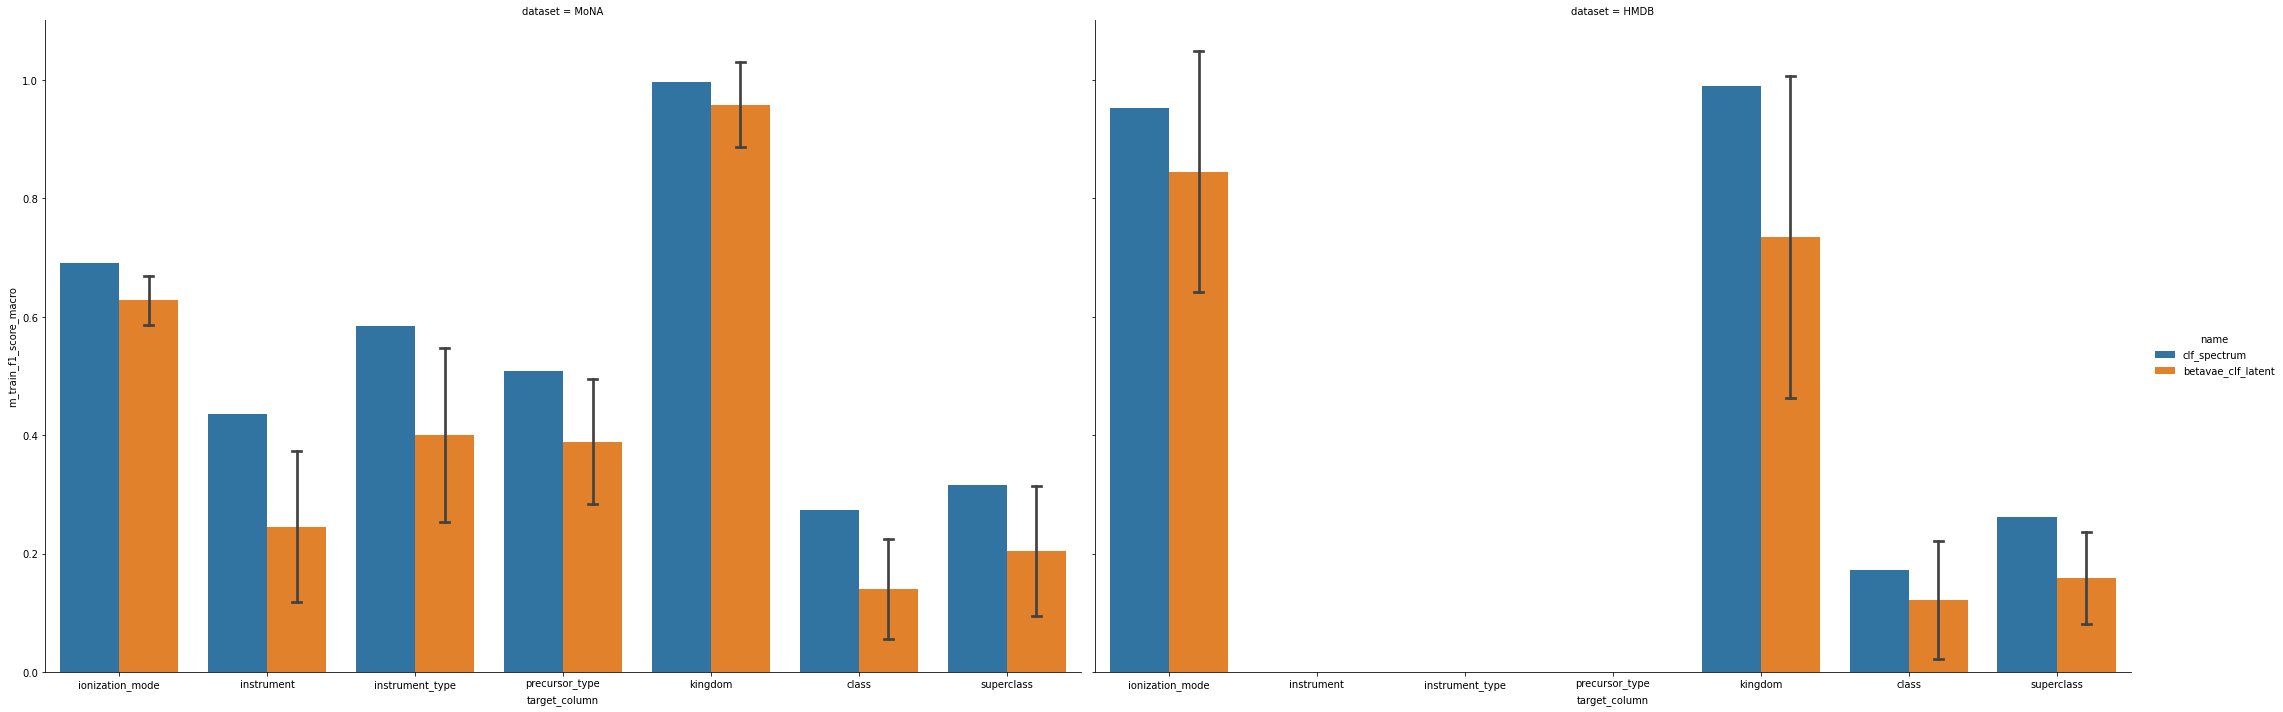

In [40]:
for column in clf_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="name", kind="bar", ci="sd", capsize=.06, height=10, aspect=1.5)

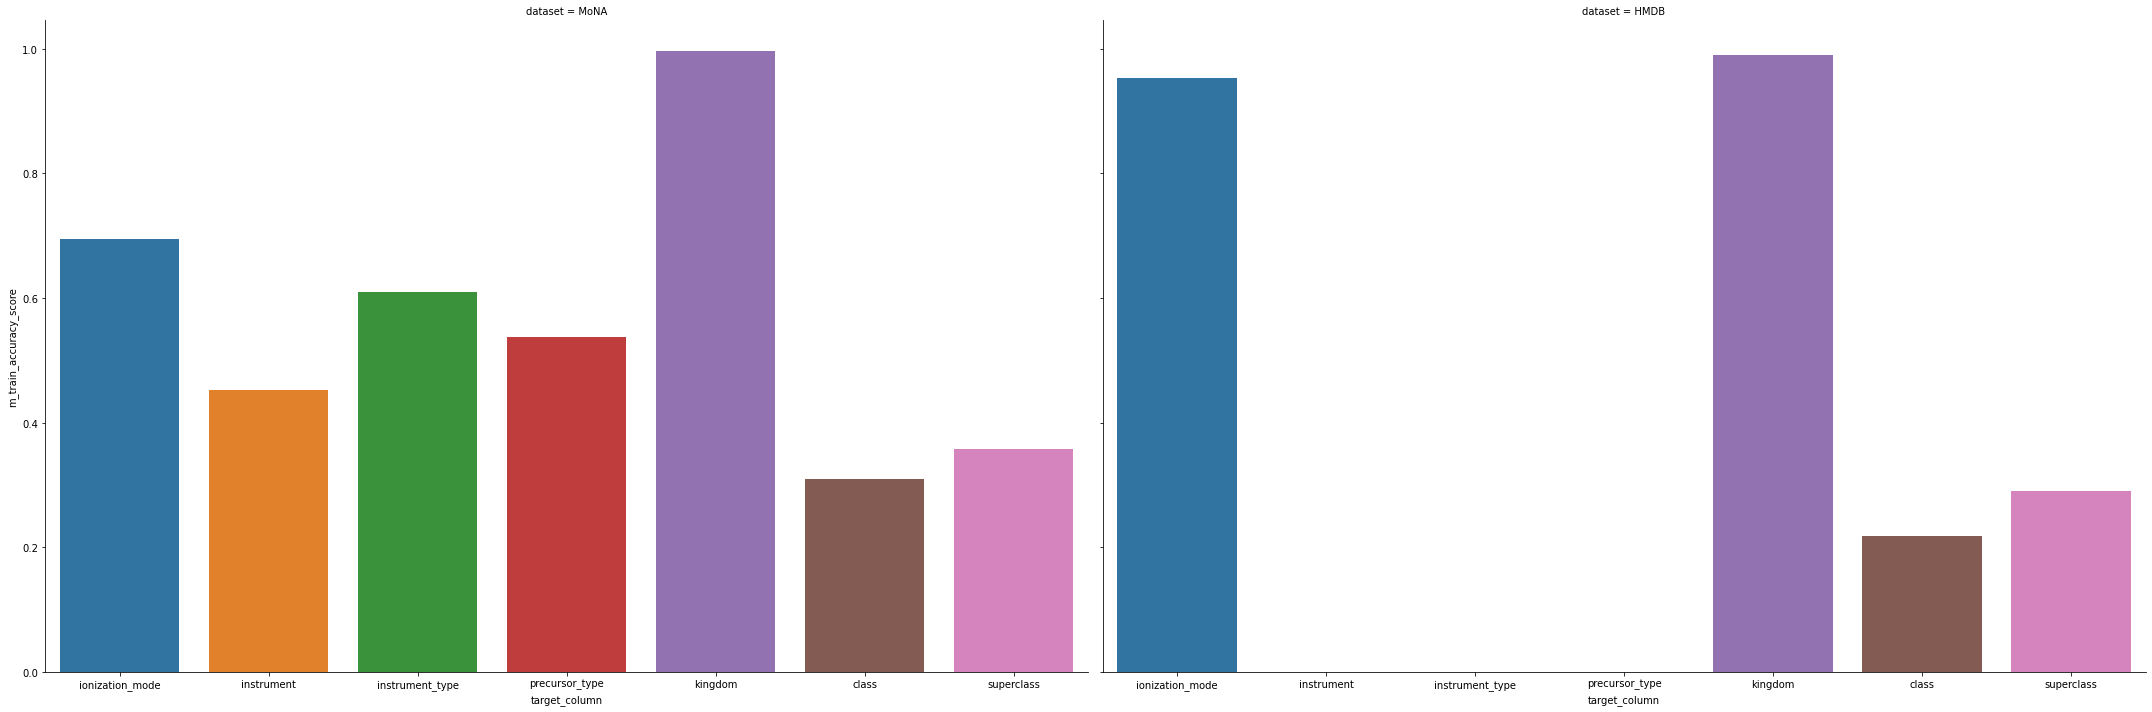

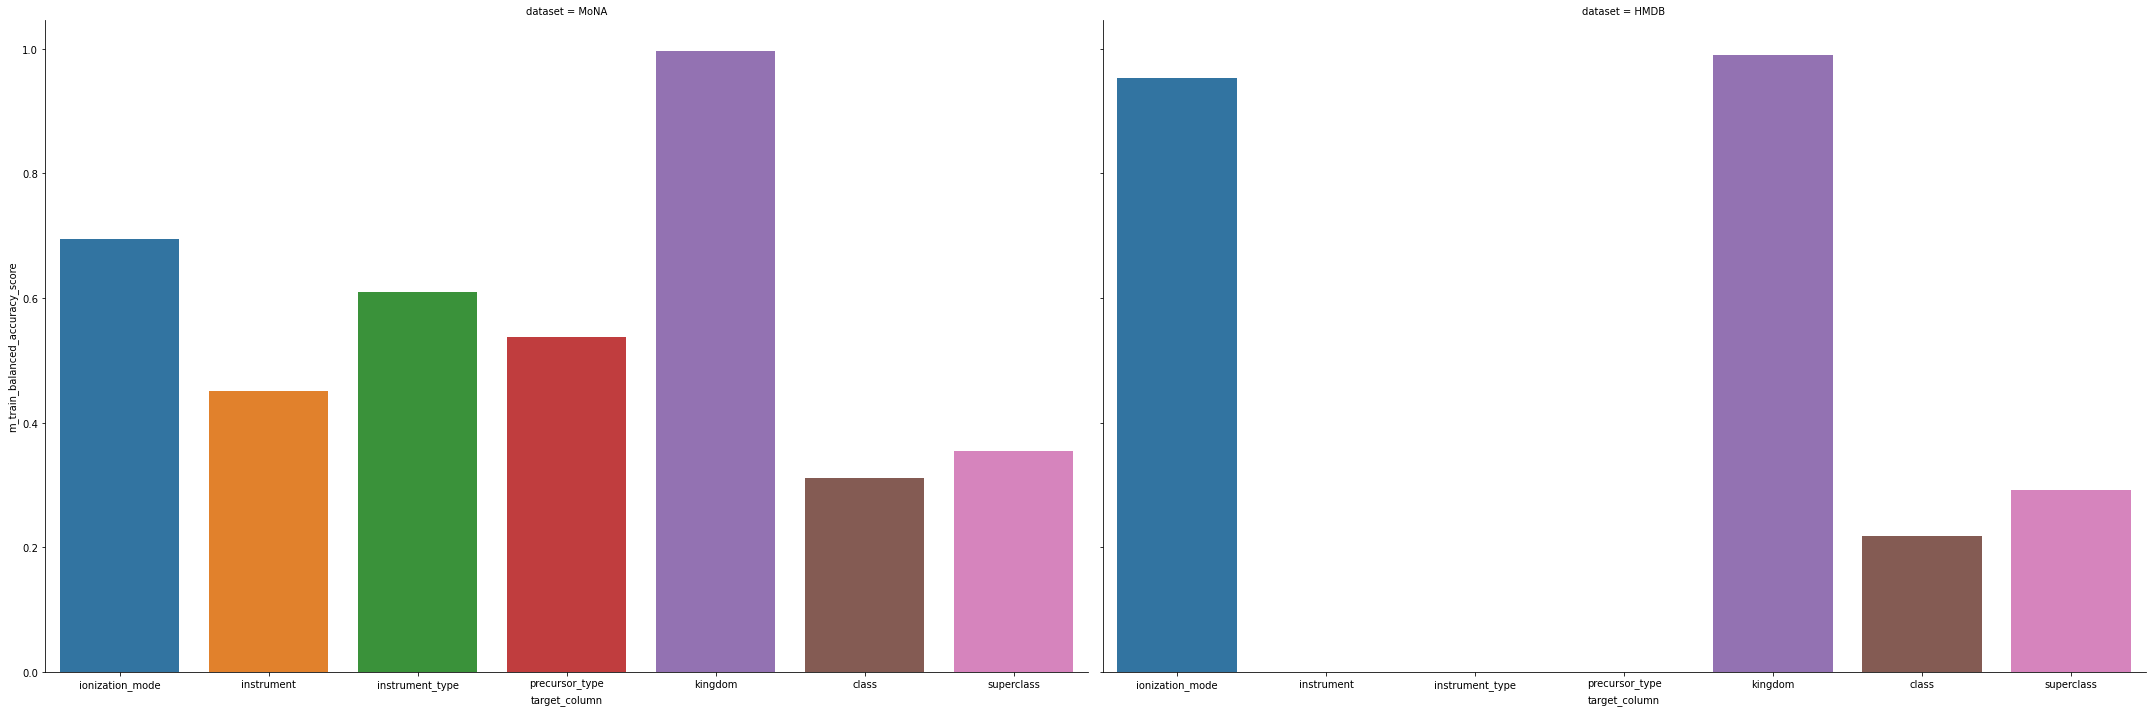

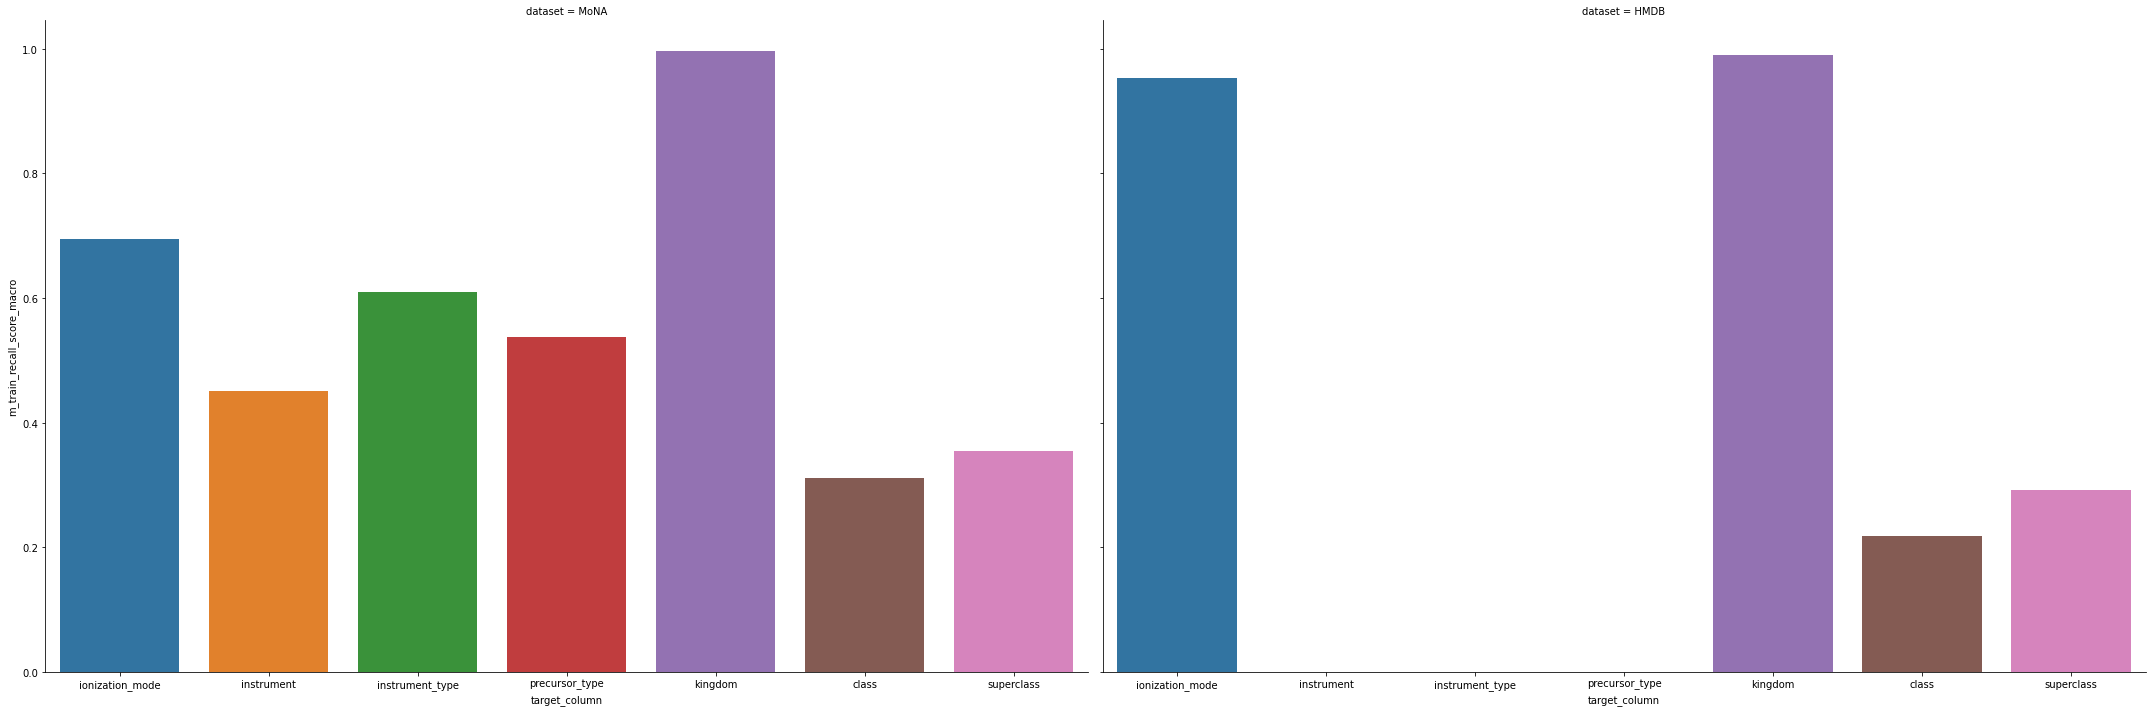

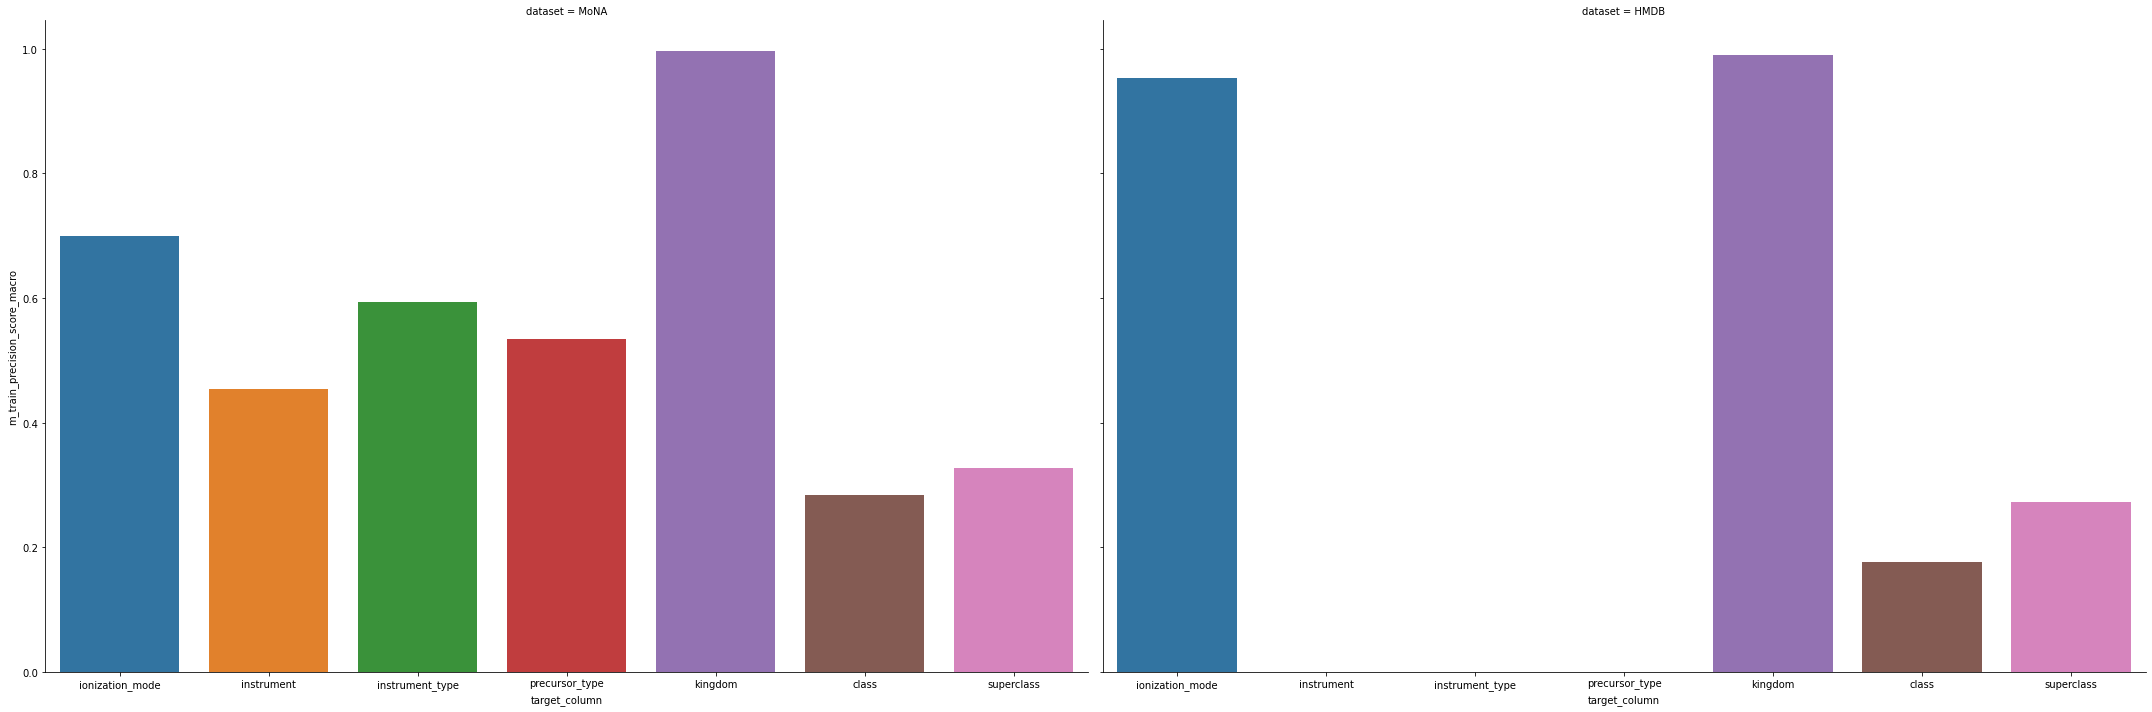

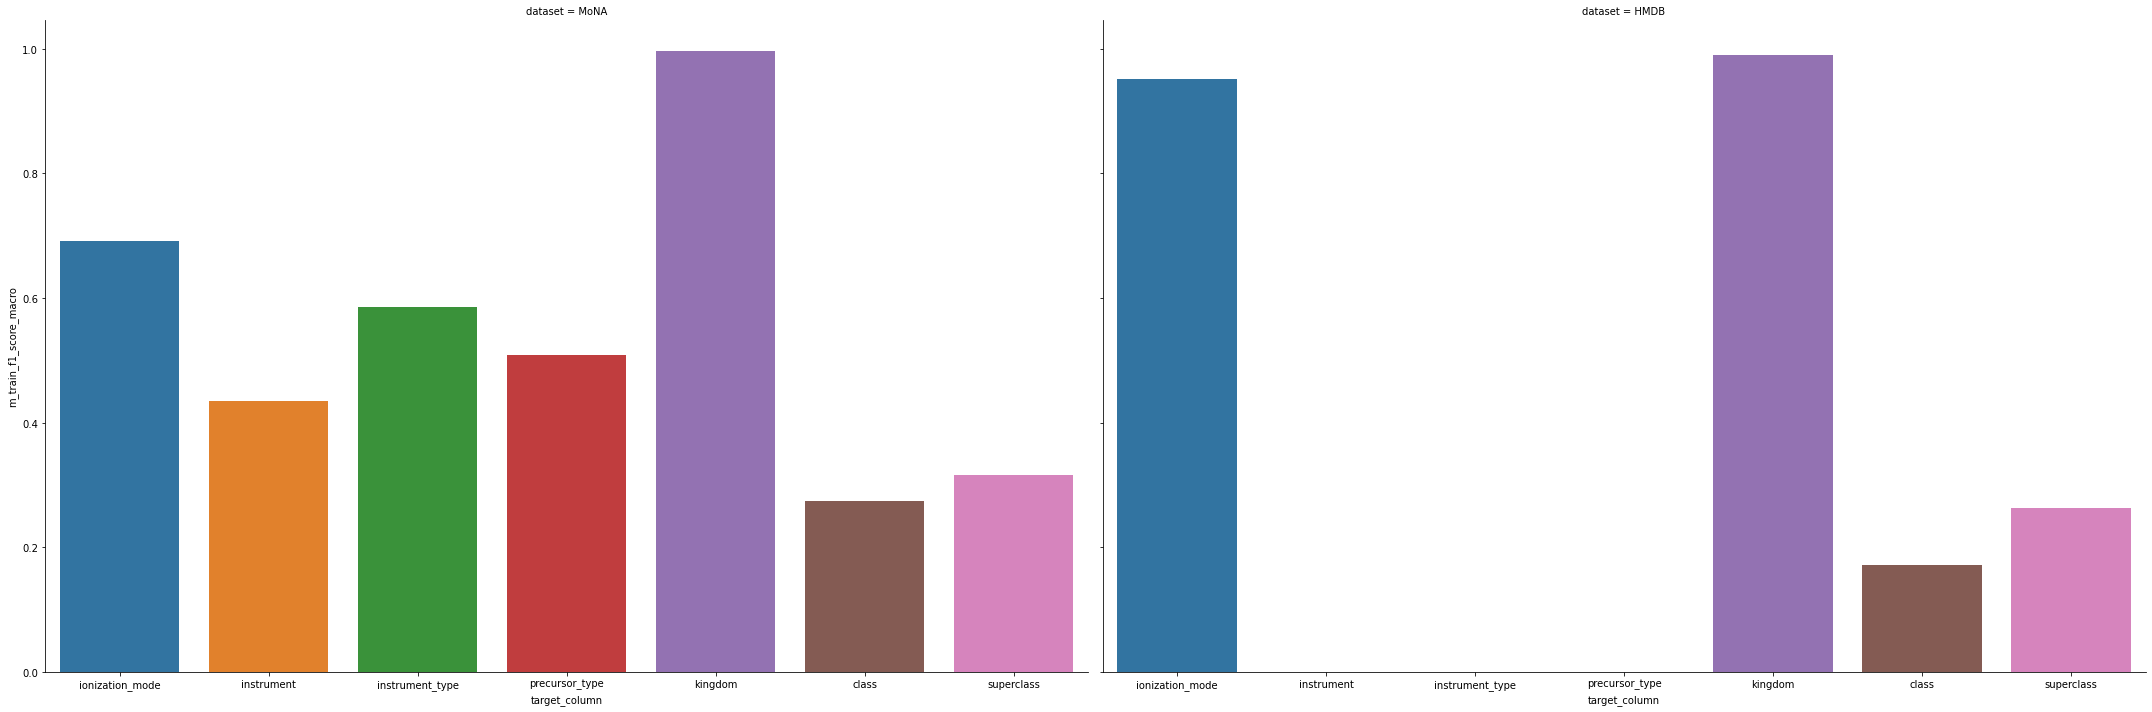

In [41]:
for column in clf_scores:
    ax = sns.catplot(data=df[df['name'] == 'clf_spectrum'], x="target_column", y=column, col='dataset',
        kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Scores vs. beta param

D:\Workspace\anaconda3\envs\specvae\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Workspace\anaconda3\envs\specvae\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Workspace\anaconda3\envs\specvae\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Workspace\anaconda3\envs\specvae\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Workspace\anaconda3\envs\specvae\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely 

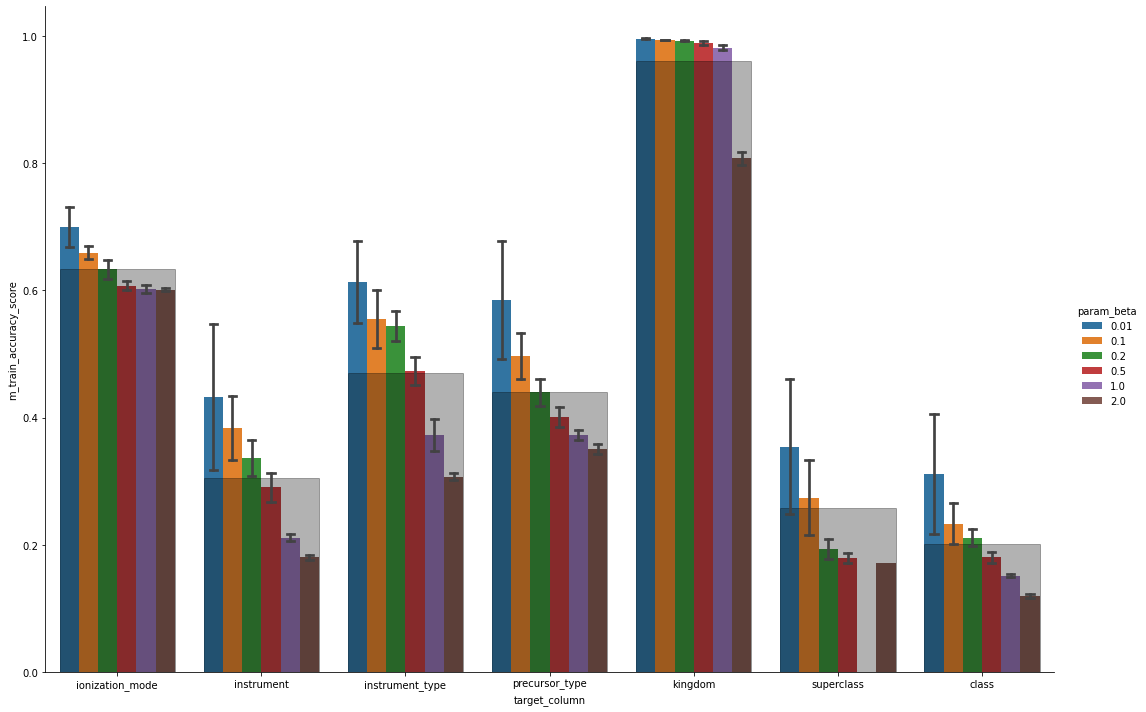

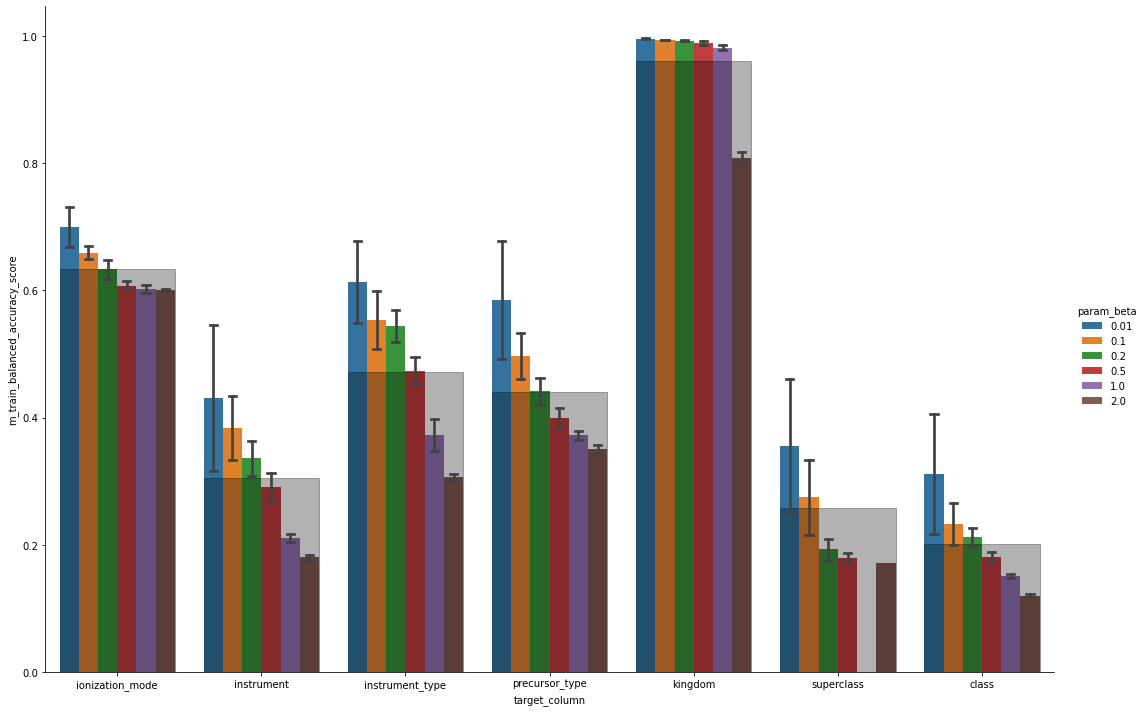

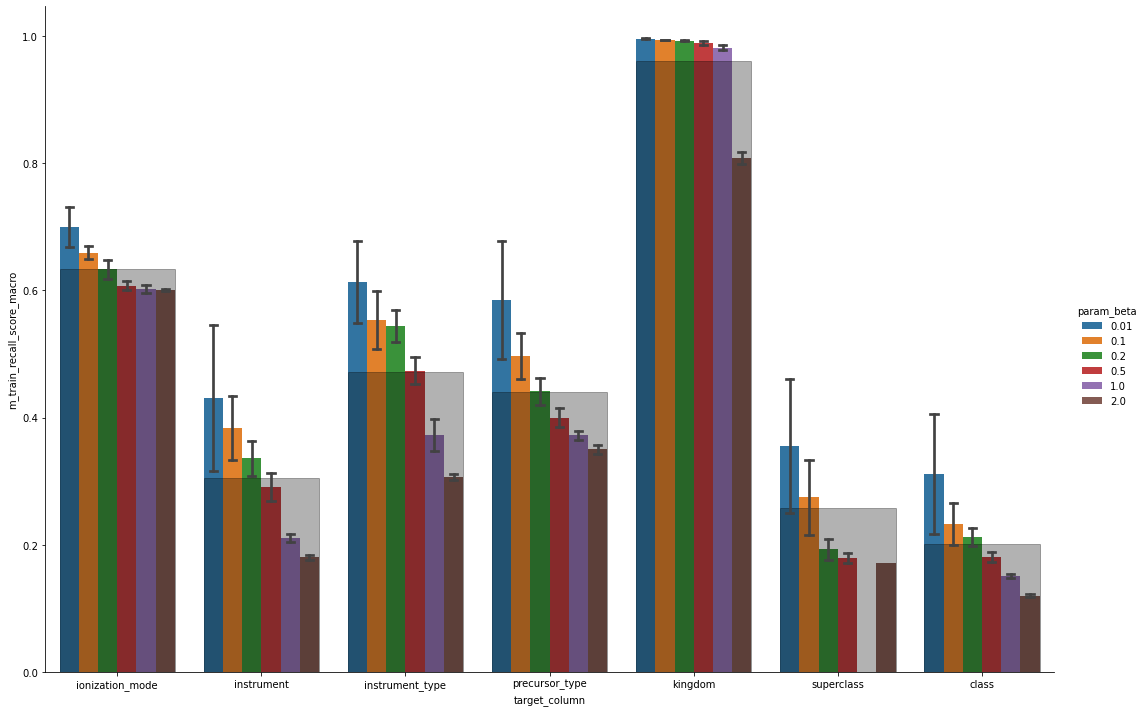

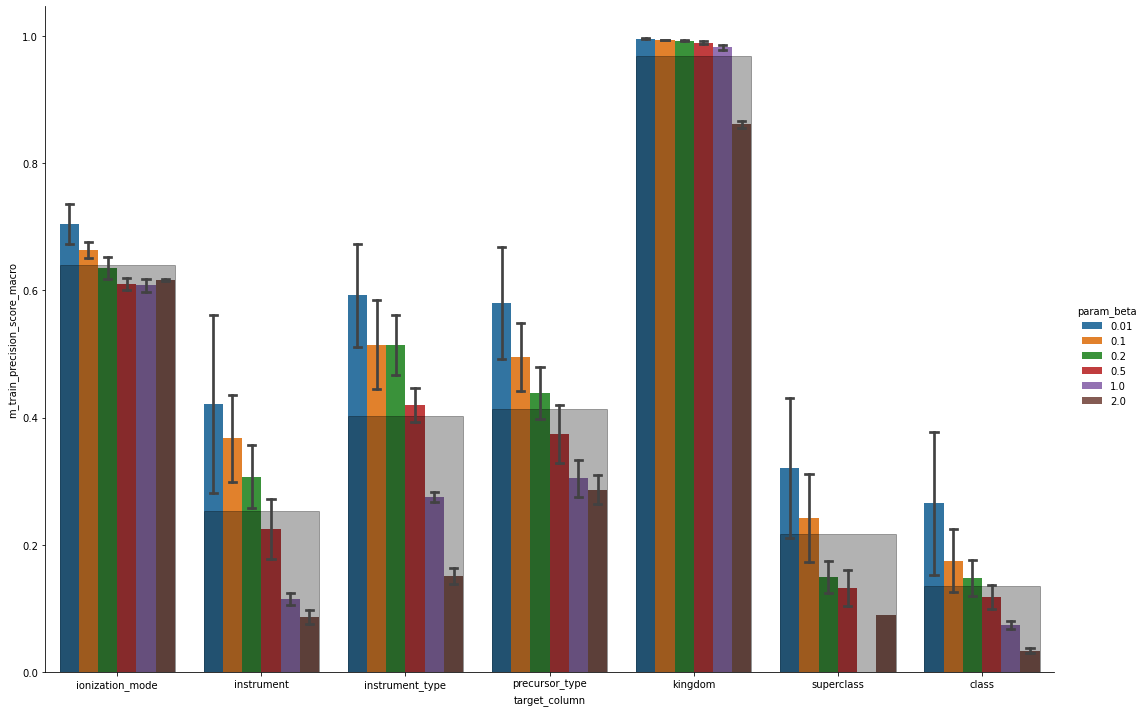

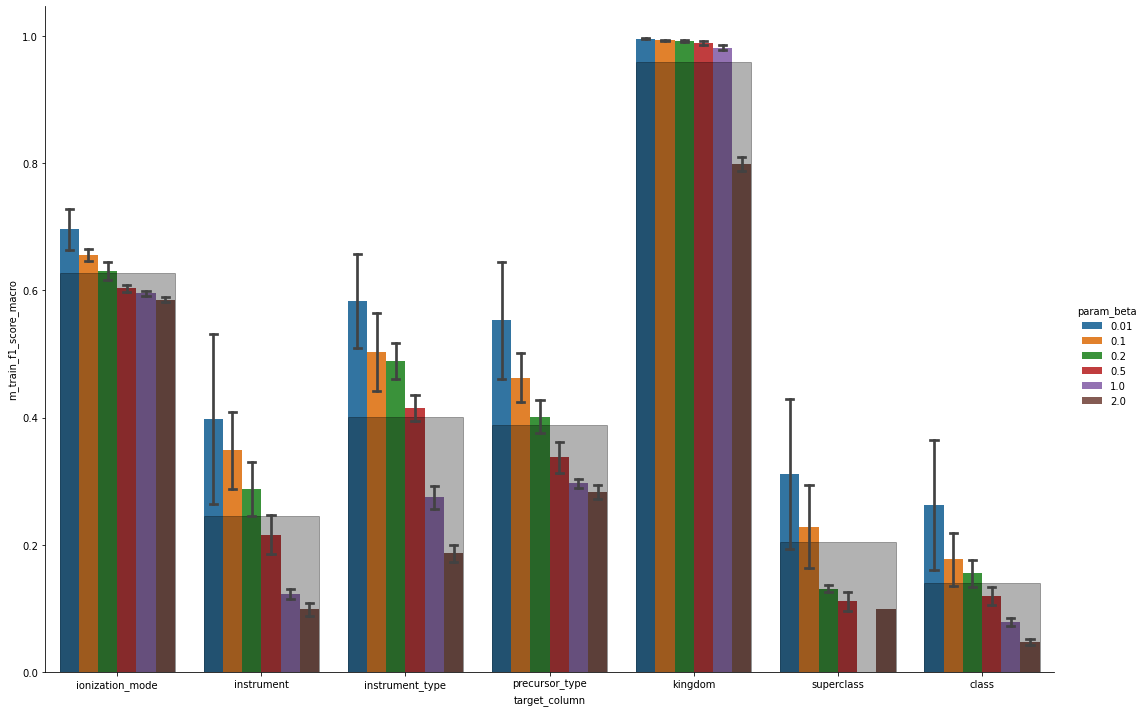

In [42]:
for column in clf_scores:
    ax = sns.catplot(data=df[(df['name'] == 'betavae_clf_latent') & (df['dataset'] == 'MoNA')], x="target_column", y=column,
        hue="param_beta", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    df_ = df[(df['name'] == 'clf_spectrum') & (df['dataset'] == 'MoNA')]
    ax.map(sns.barplot, 'target_column', column, data=df_,
        alpha=0.3, linewidth=1., color='black', edgecolor="black", ci=None)

## Scores vs. latent dimension

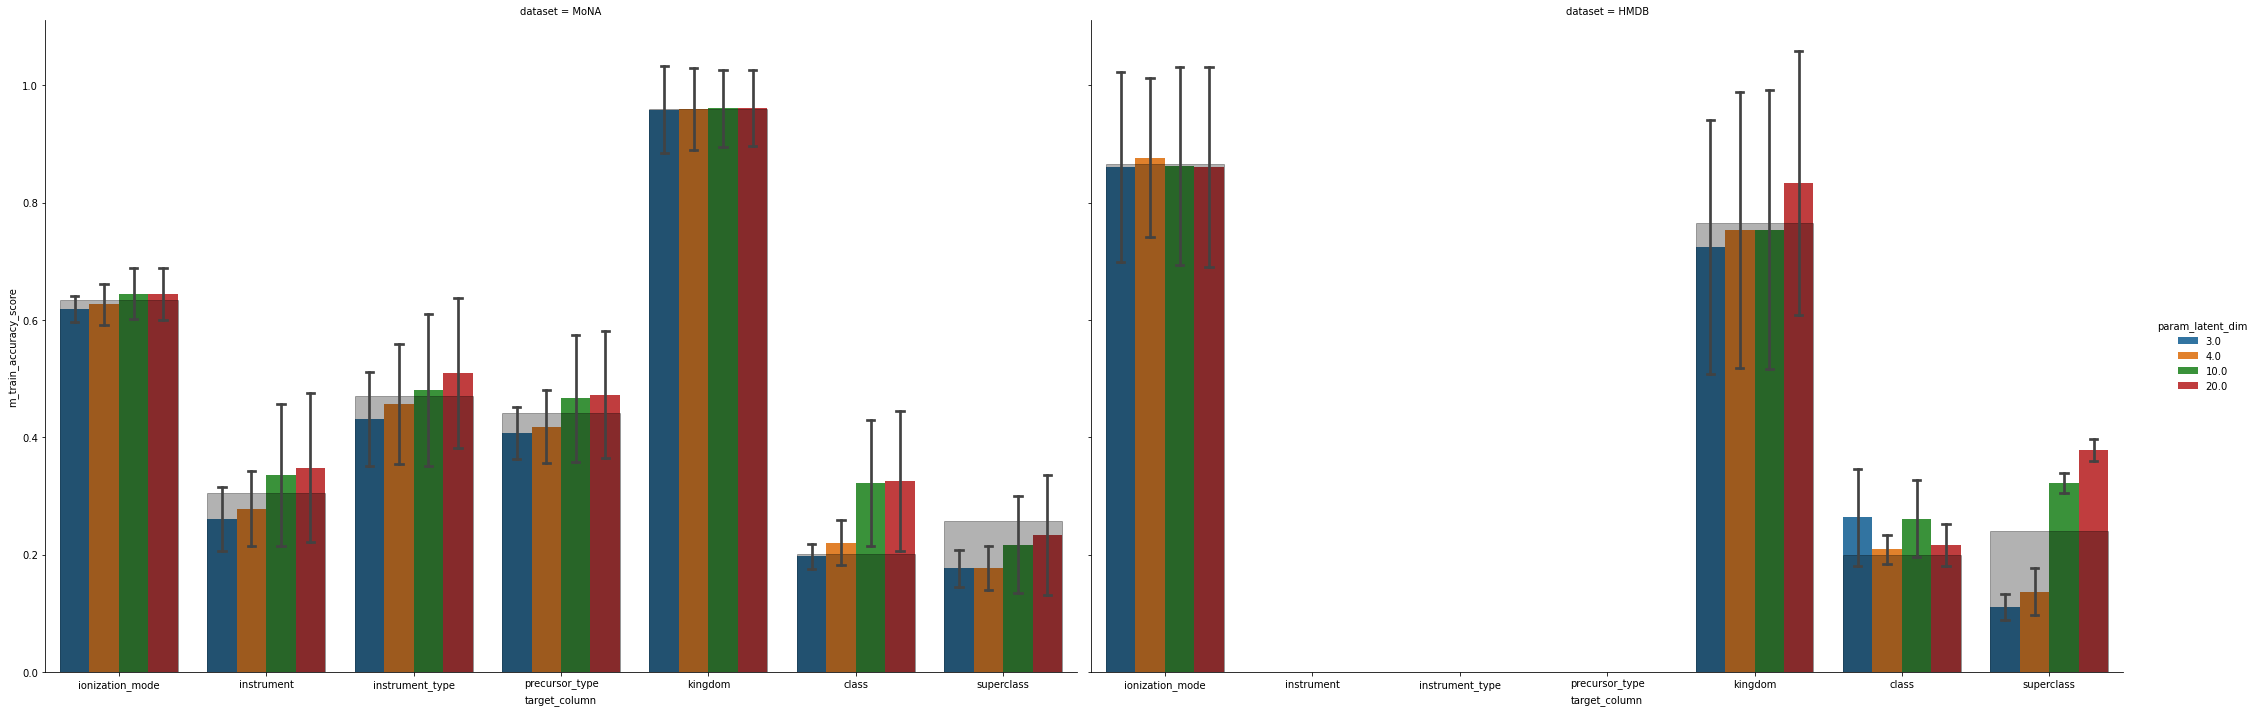

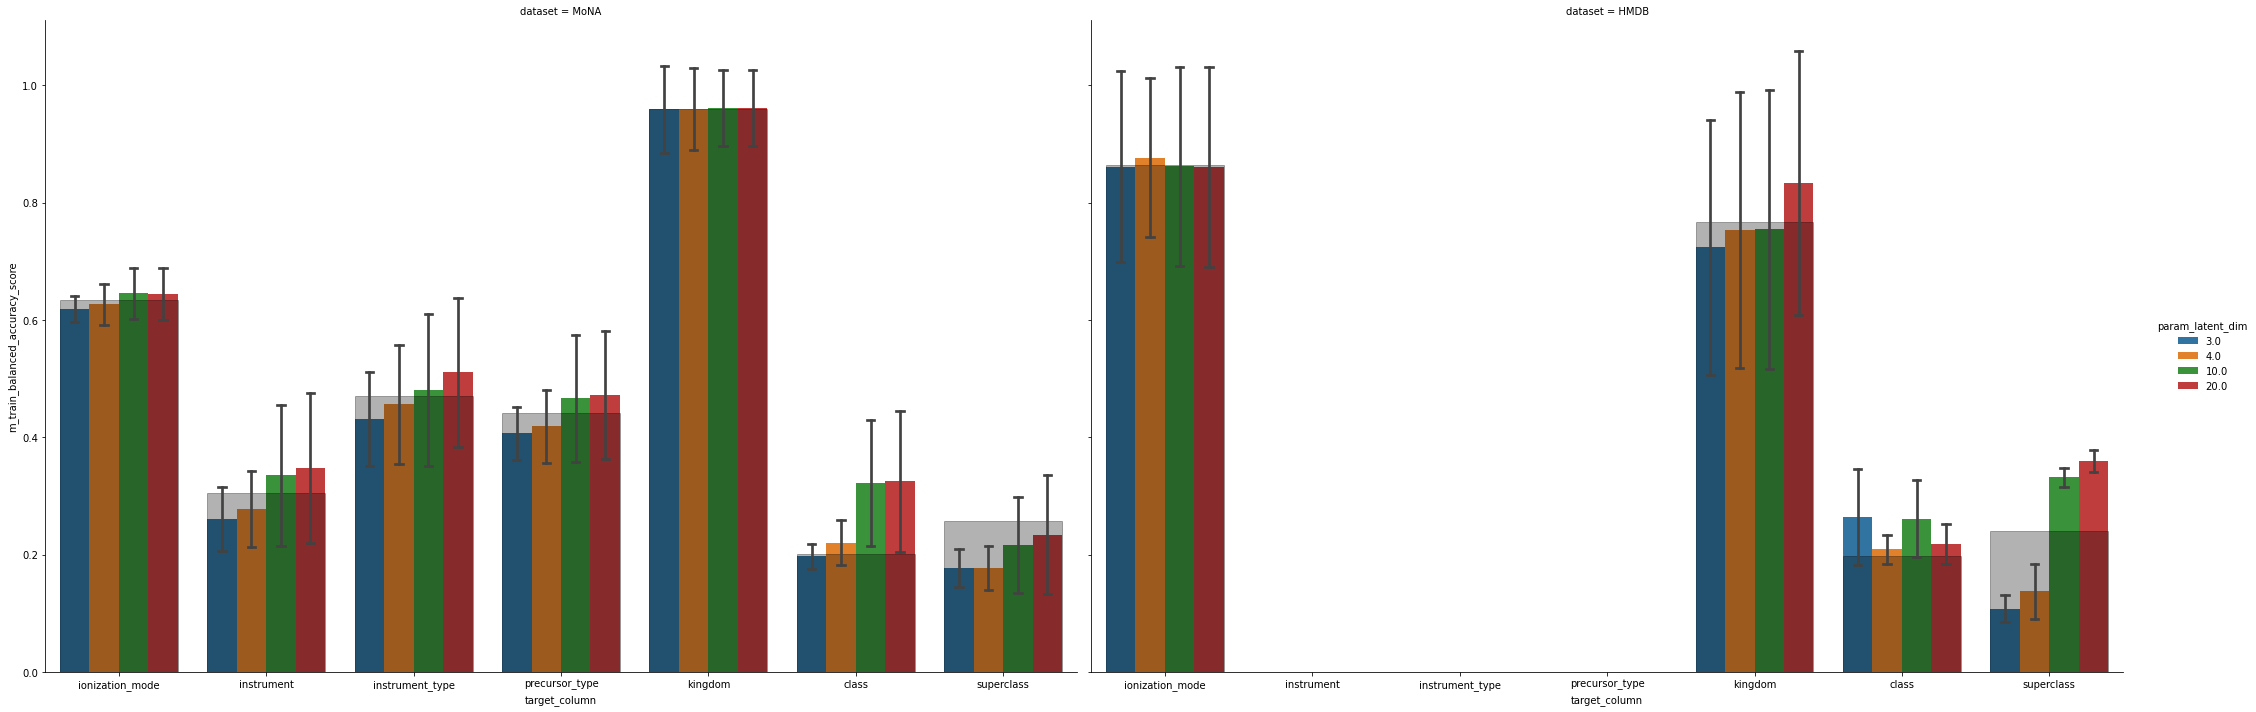

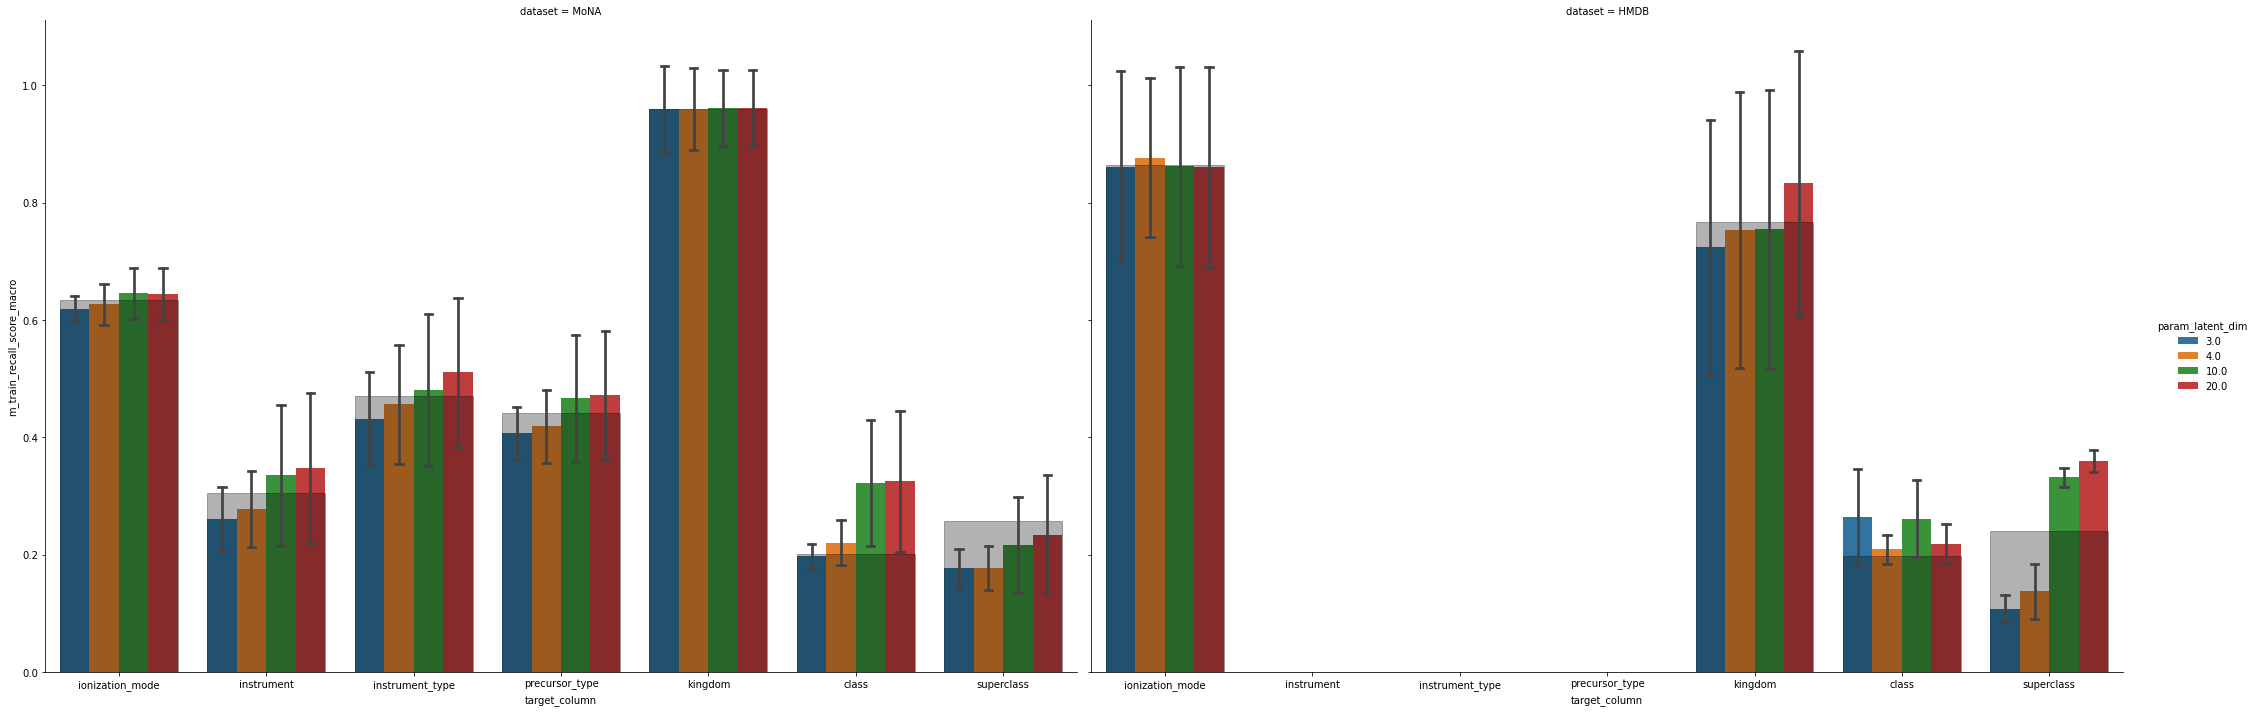

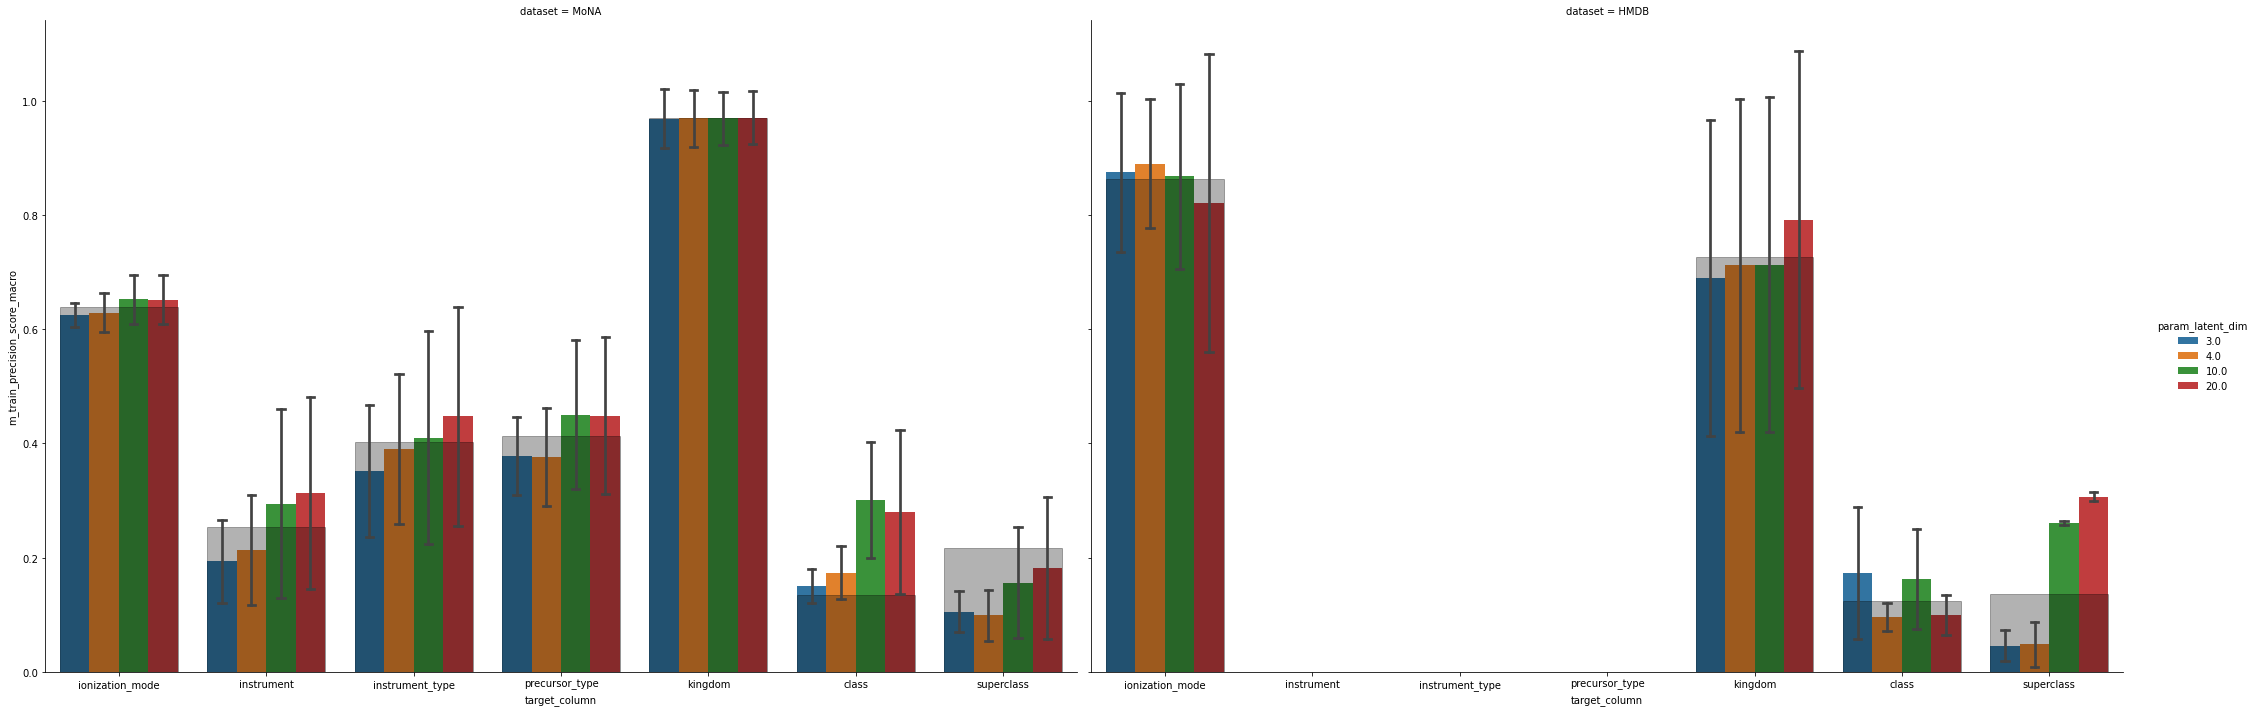

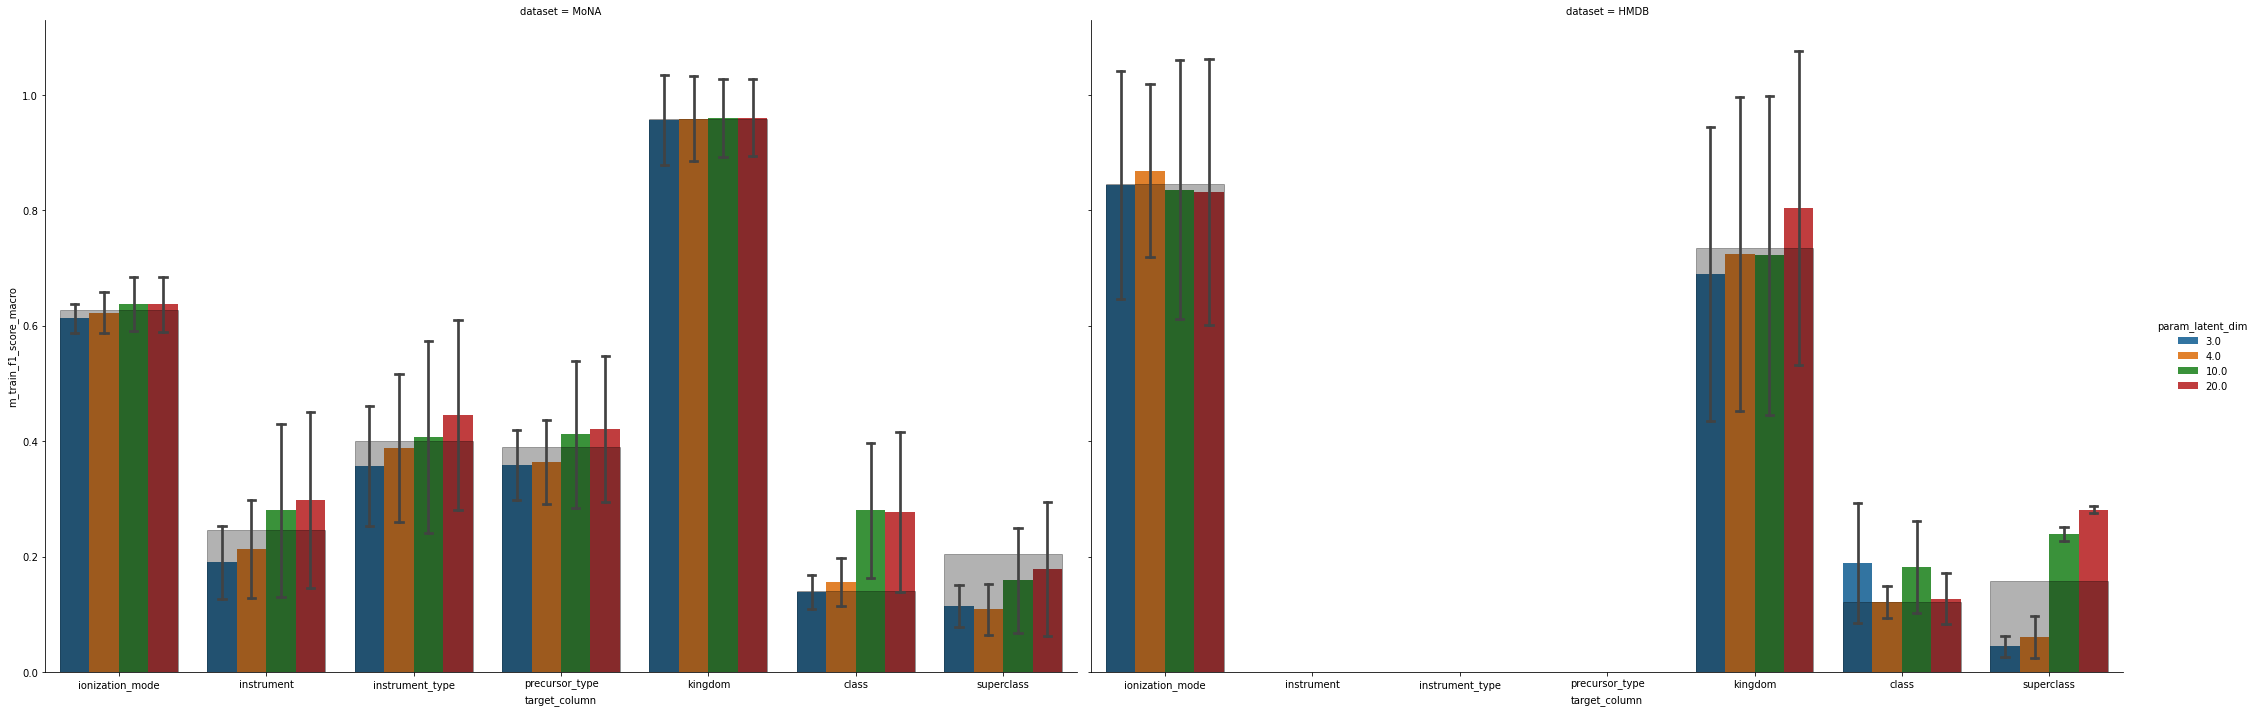

In [43]:
for column in clf_scores:
    ax = sns.catplot(data=df[df['name'] == 'betavae_clf_latent'], x="target_column", y=column, col='dataset',
        hue="param_latent_dim", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    ax.map(sns.barplot, 'target_column', column, data=df[df['name'] == 'clf_spectrum'], 
        order=df['target_column'].unique().tolist(), alpha=0.3, linewidth=1., color='black', edgecolor="black", ci=None)

## Selected models

In [70]:
df_1 = df[(df['name'] == 'betavae_clf_latent') & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False)& \
            (df['param_latent_dim'] == 20) & \
            (df['param_beta'] == 0.01)
        ]
df_2 = df[(df['name'] == 'clf_spectrum')]
df_ = pd.concat([df_1, df_2])

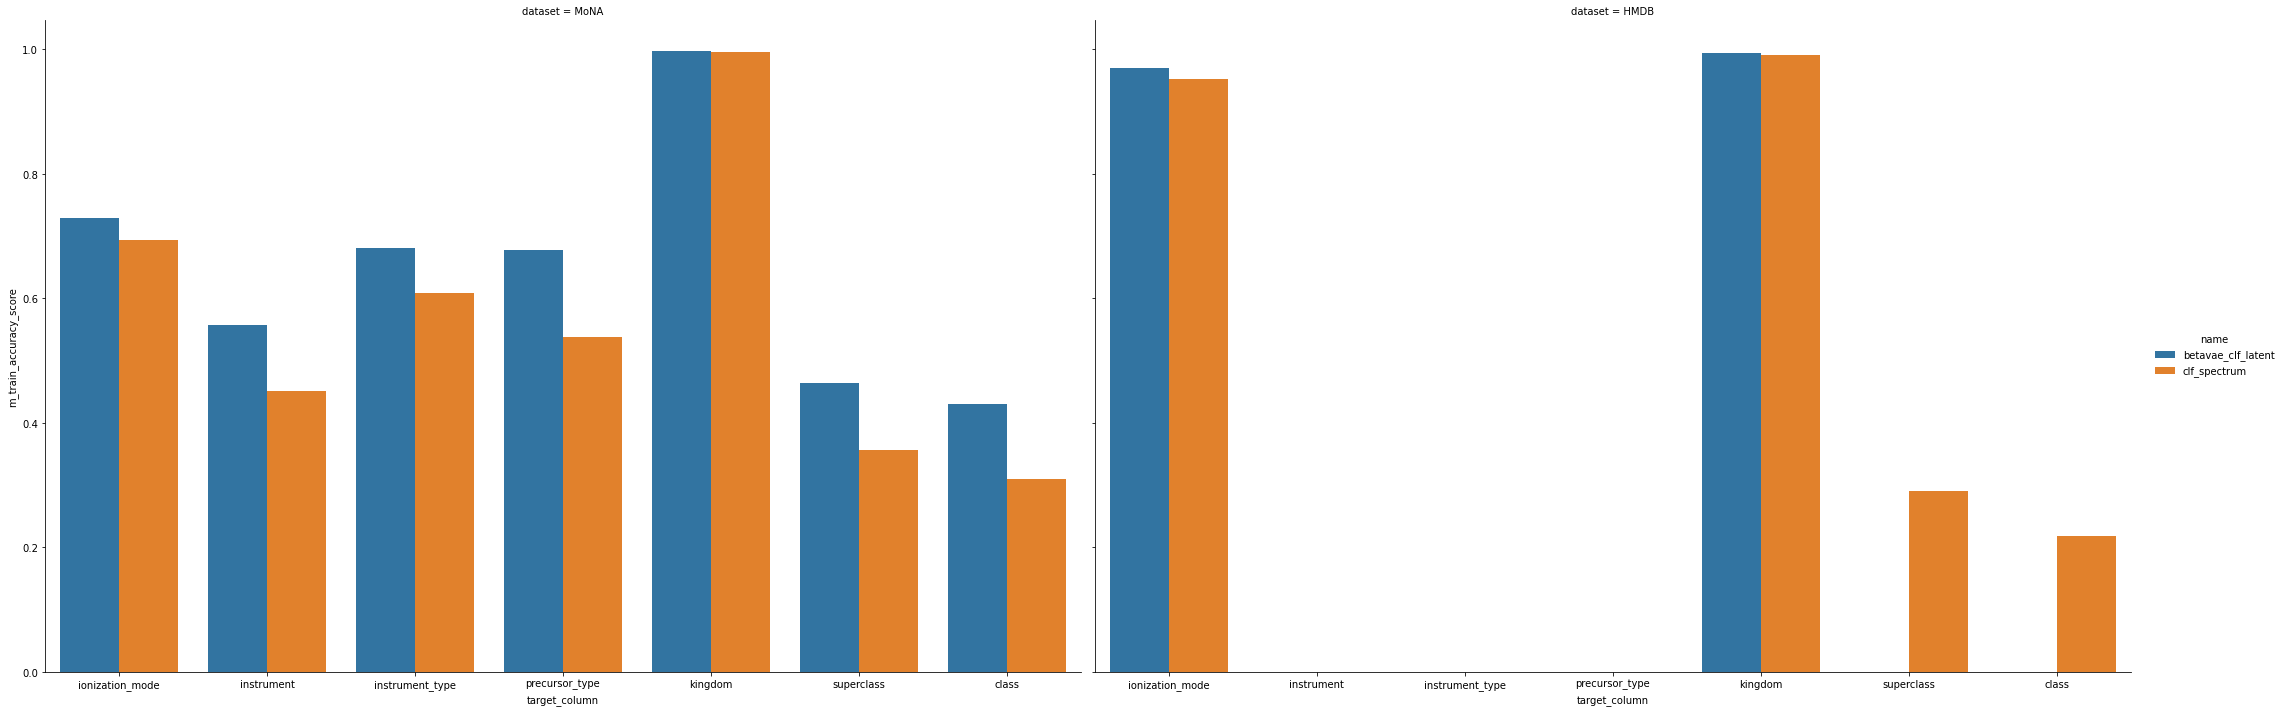

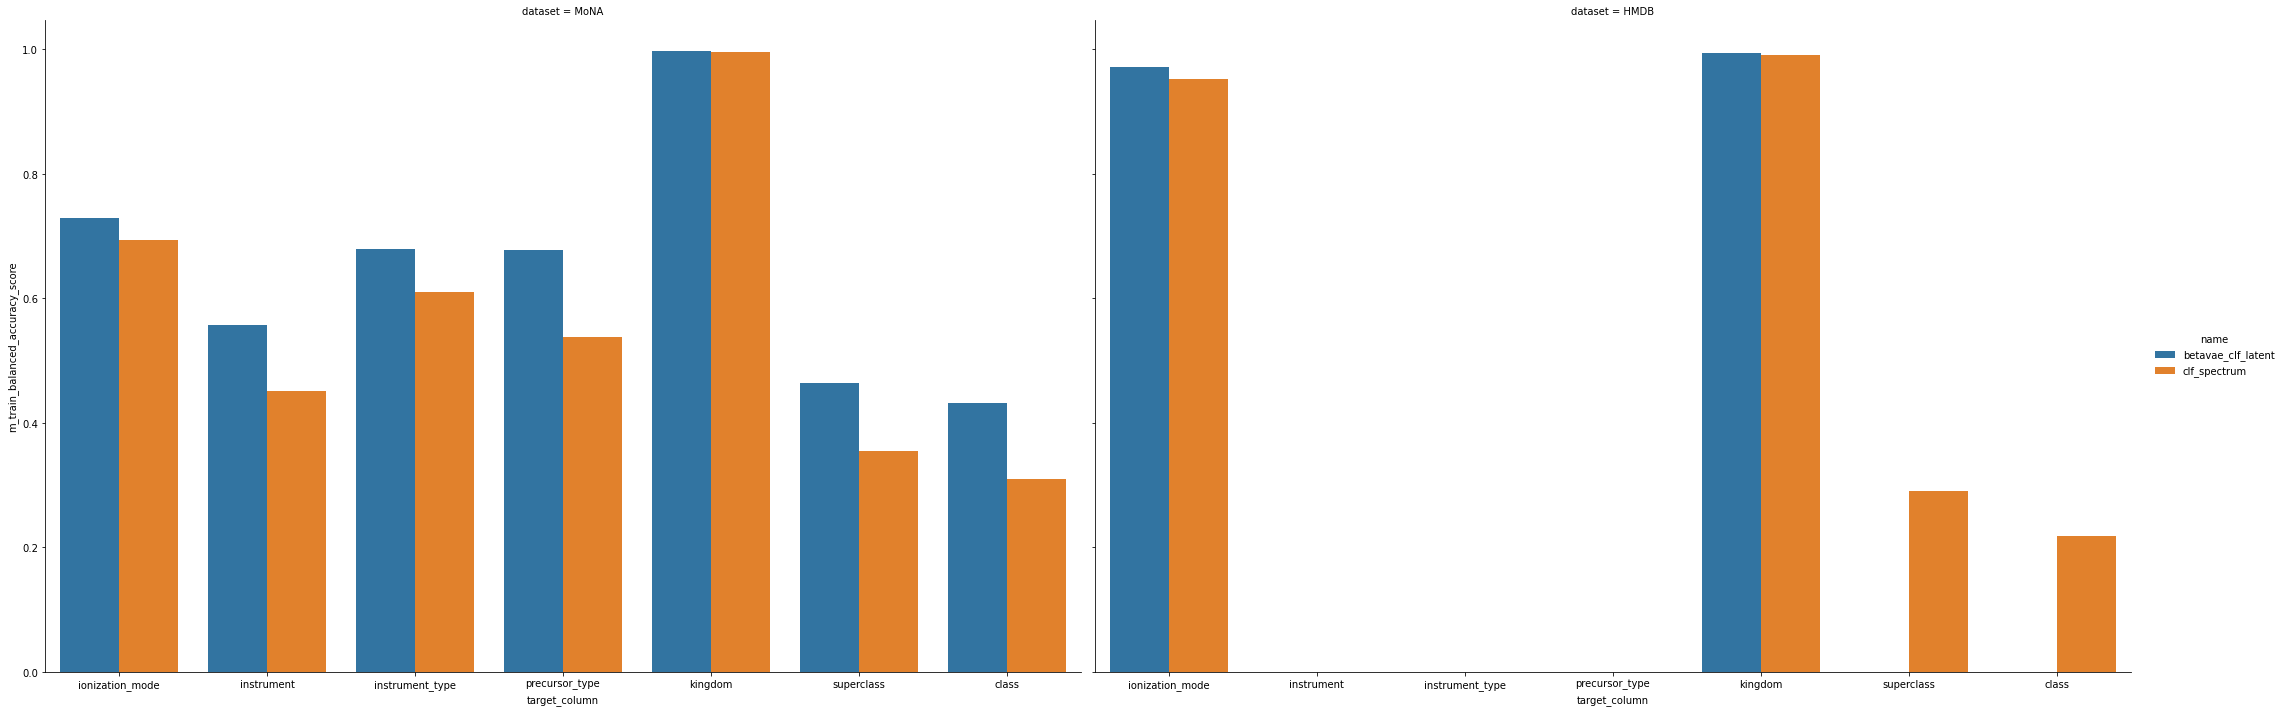

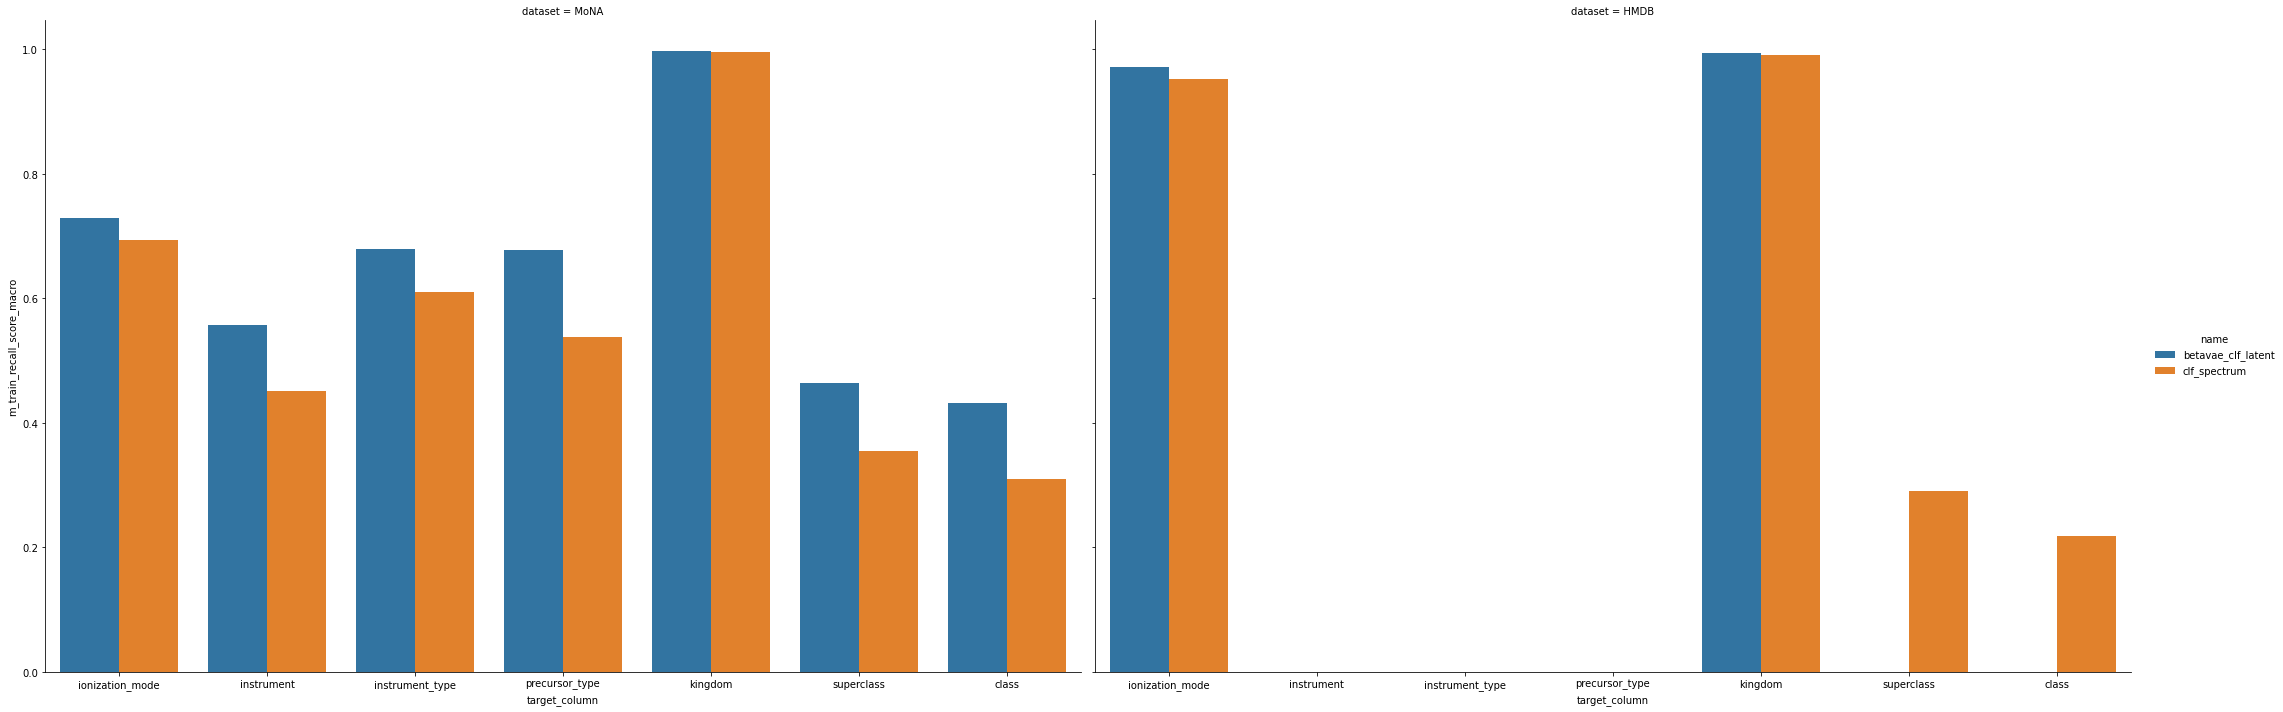

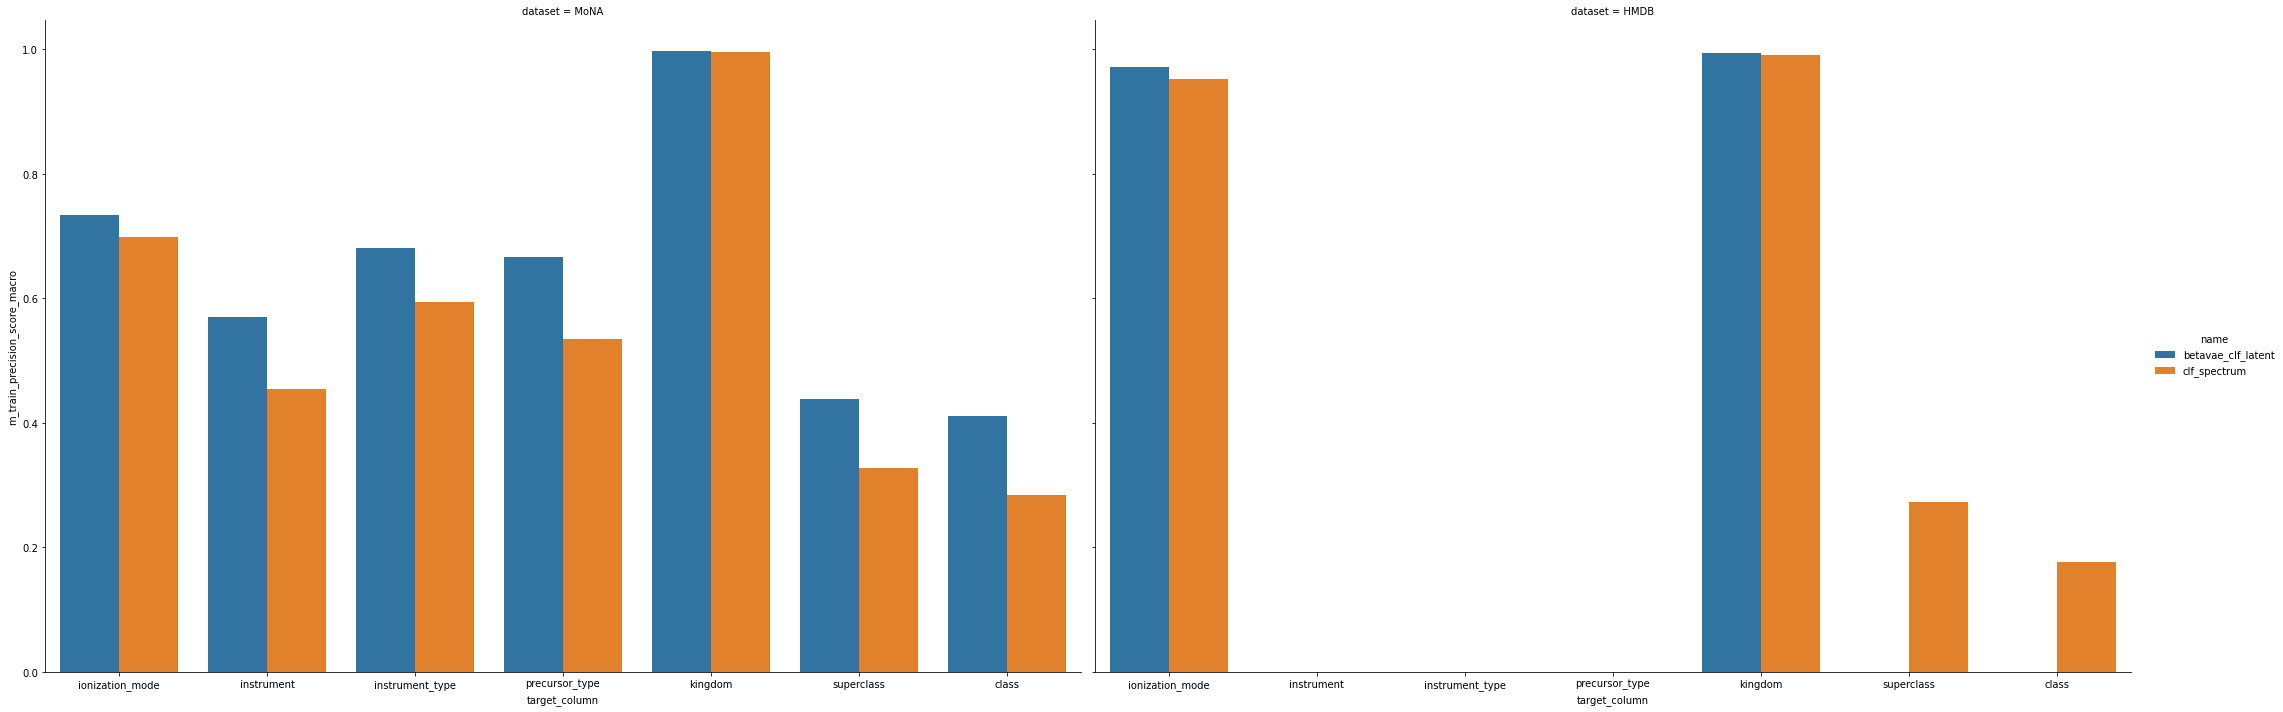

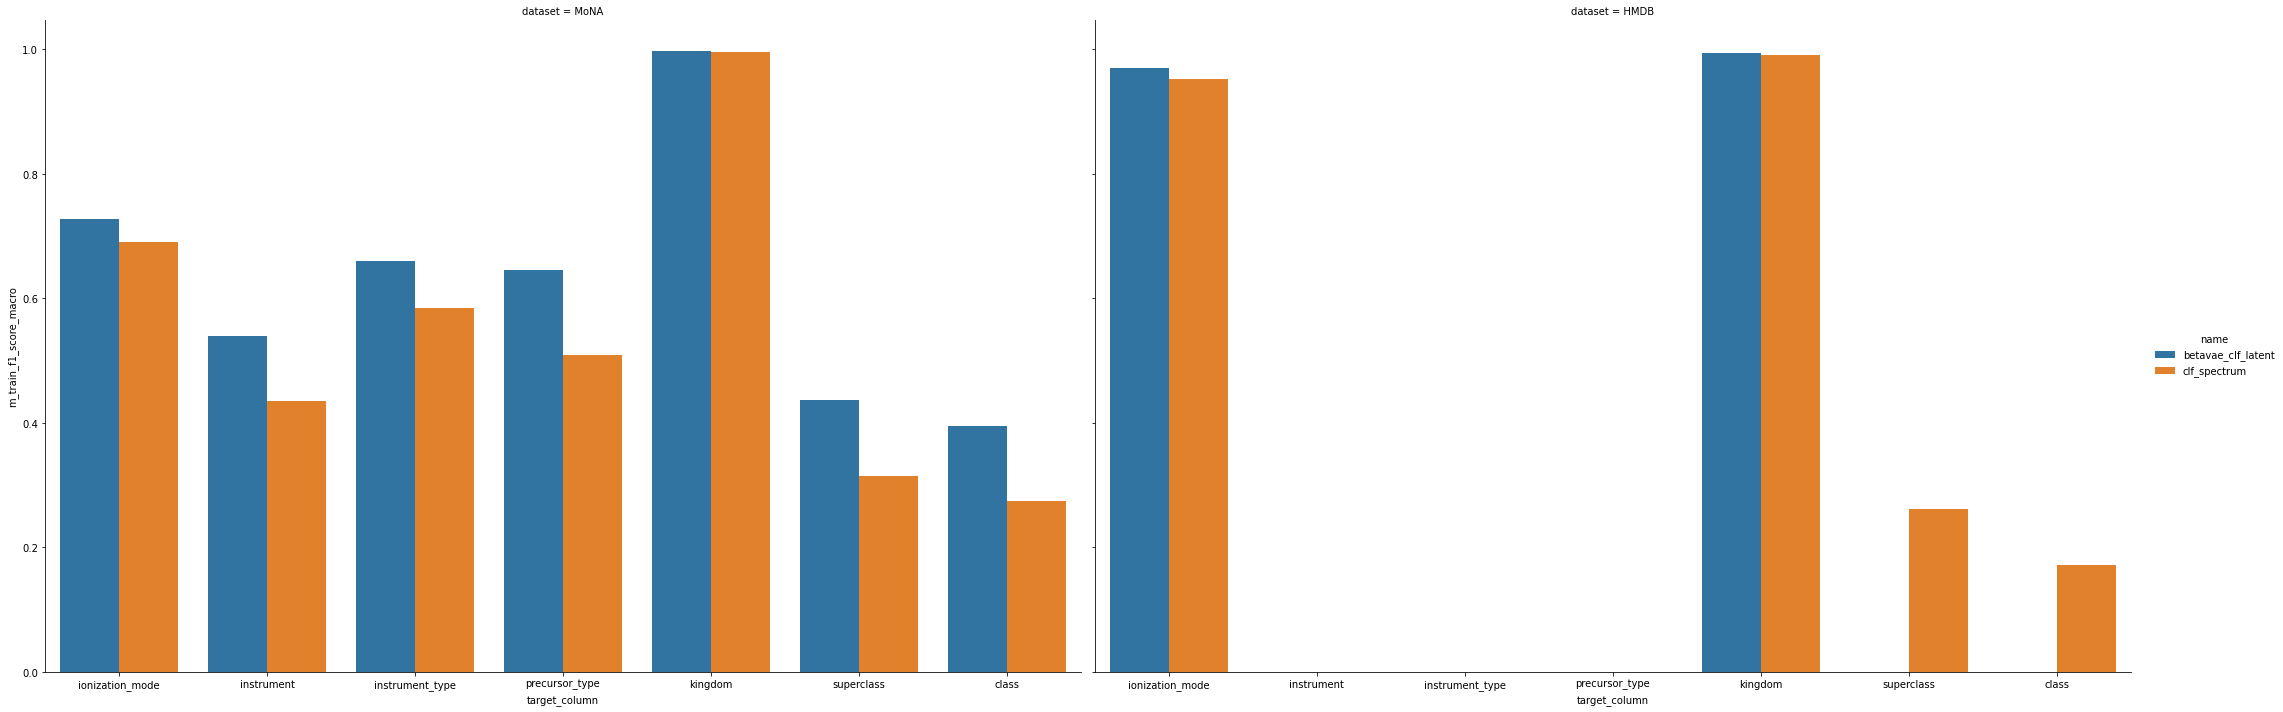

In [71]:
for column in clf_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column, col='dataset',
        hue="name", kind="bar", ci="sd", capsize=.06, height=10, aspect=1.5)
    plt.savefig(f'../.img/clf-latent-{column}.svg')

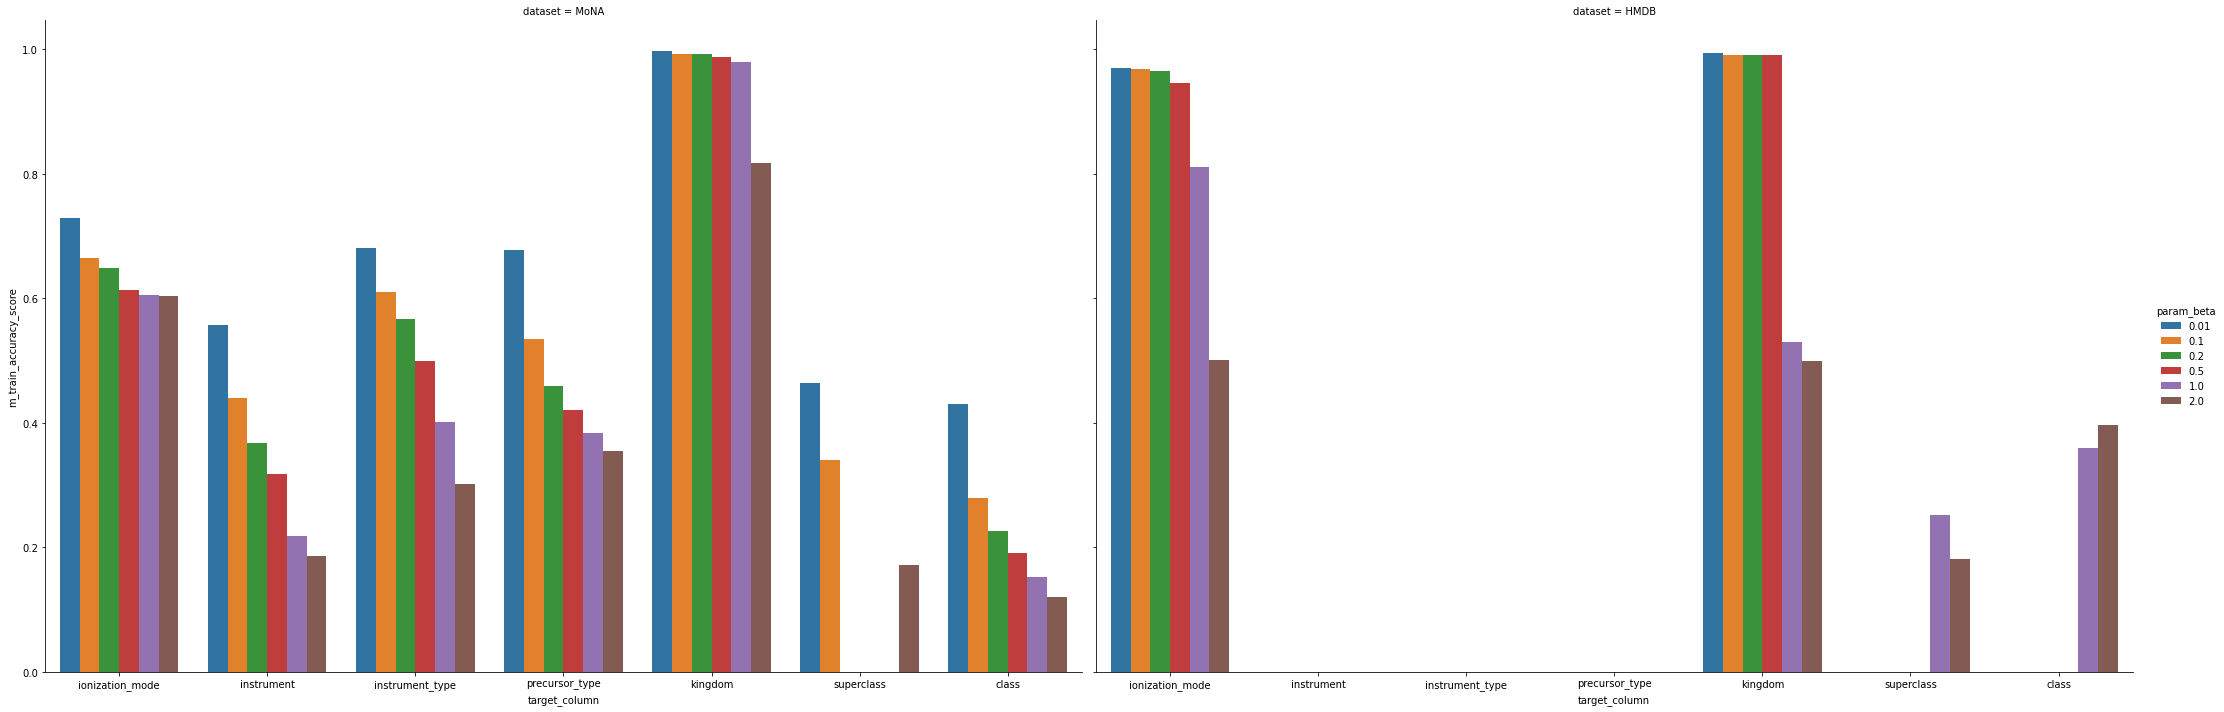

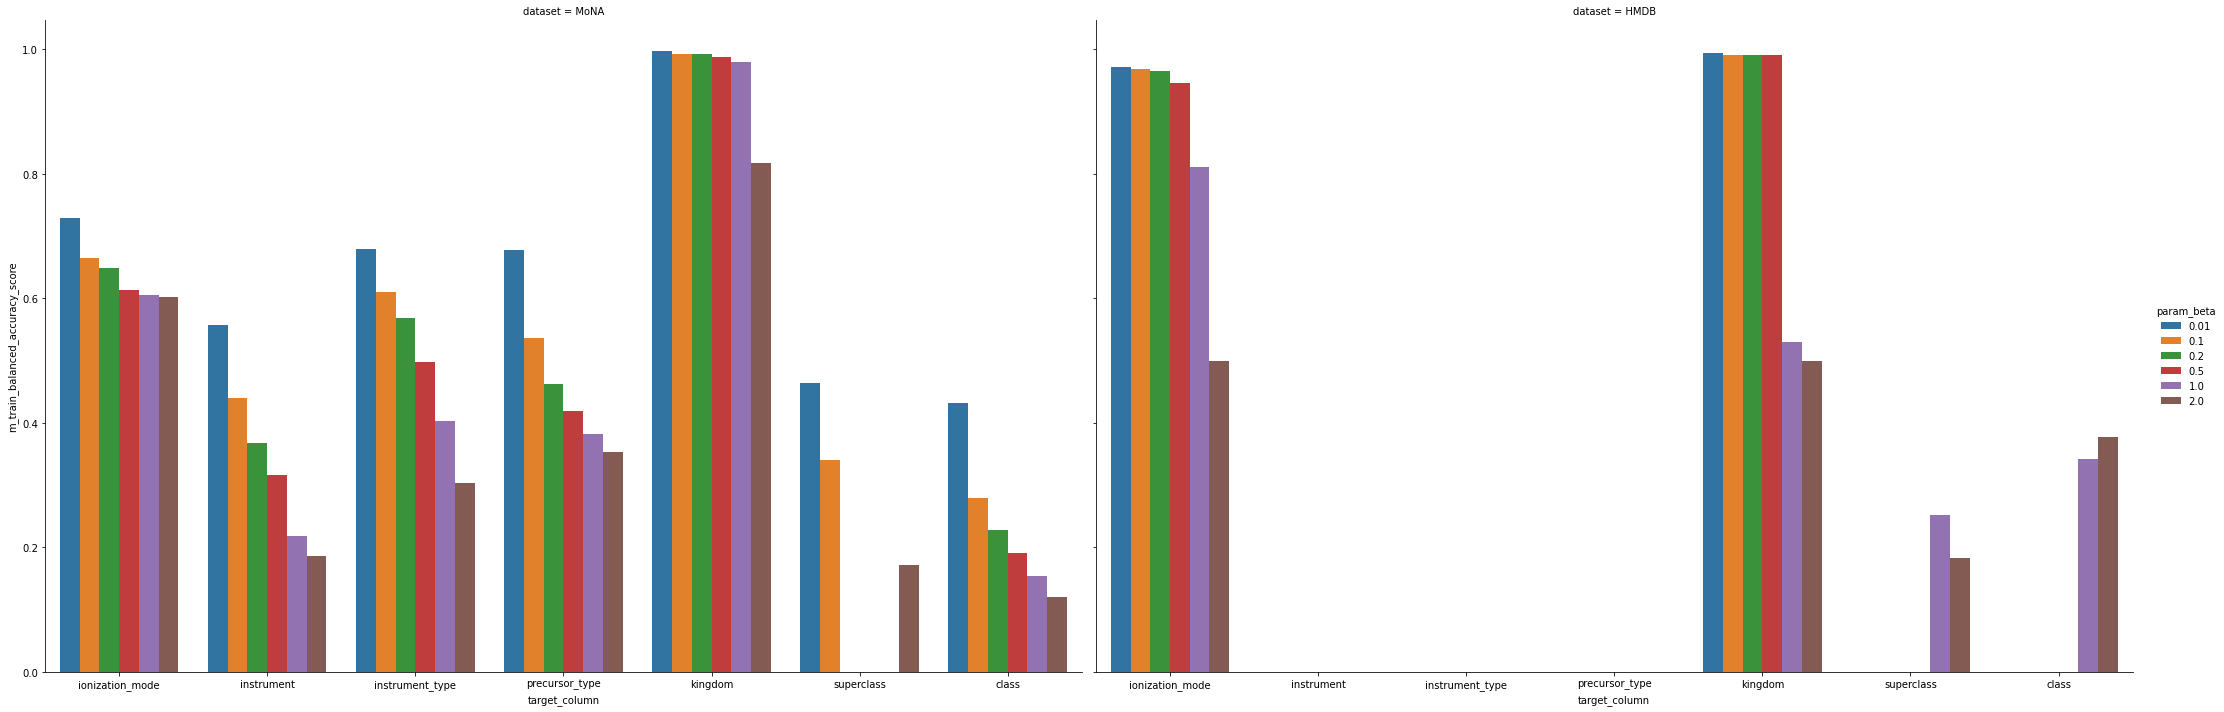

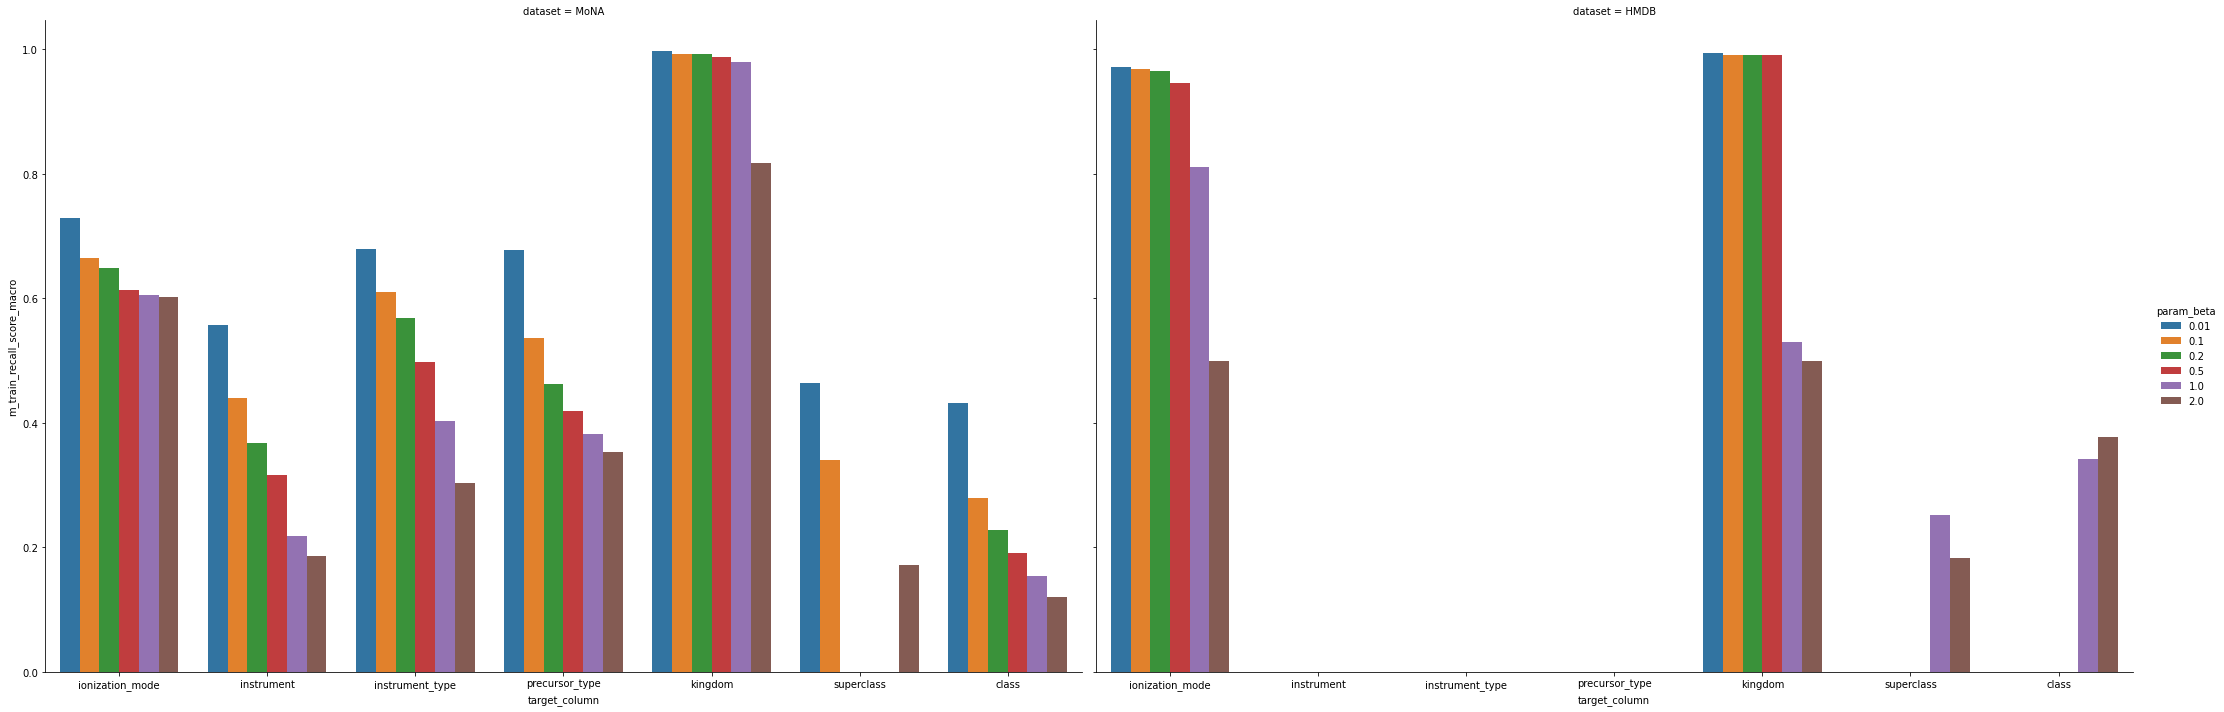

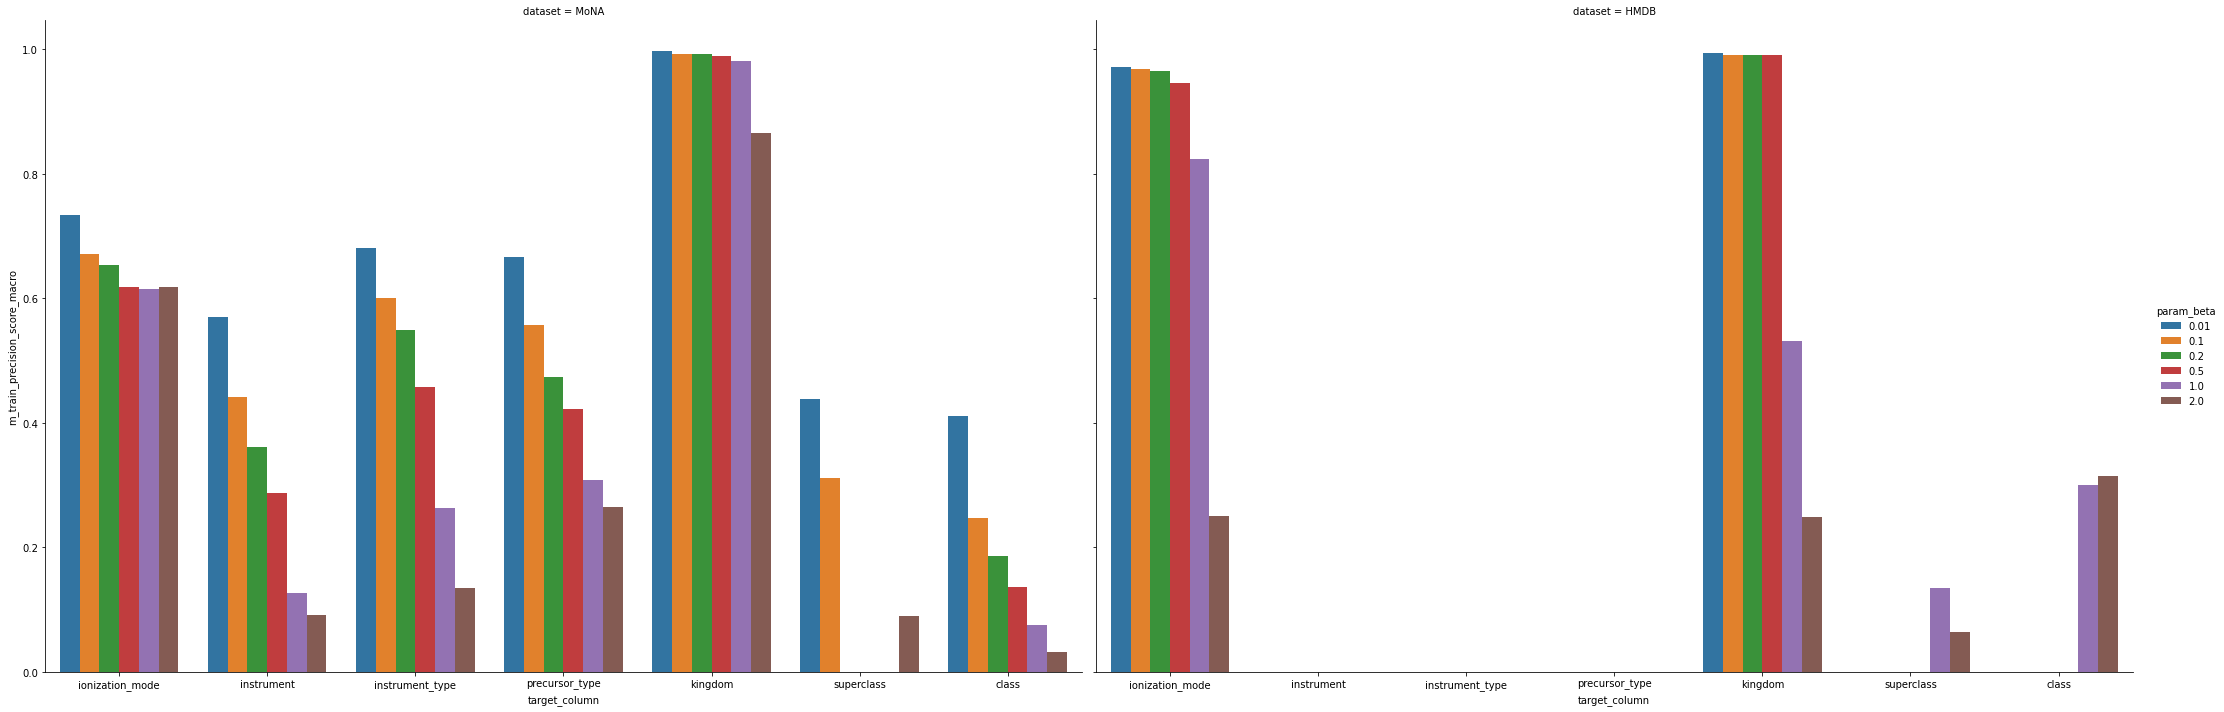

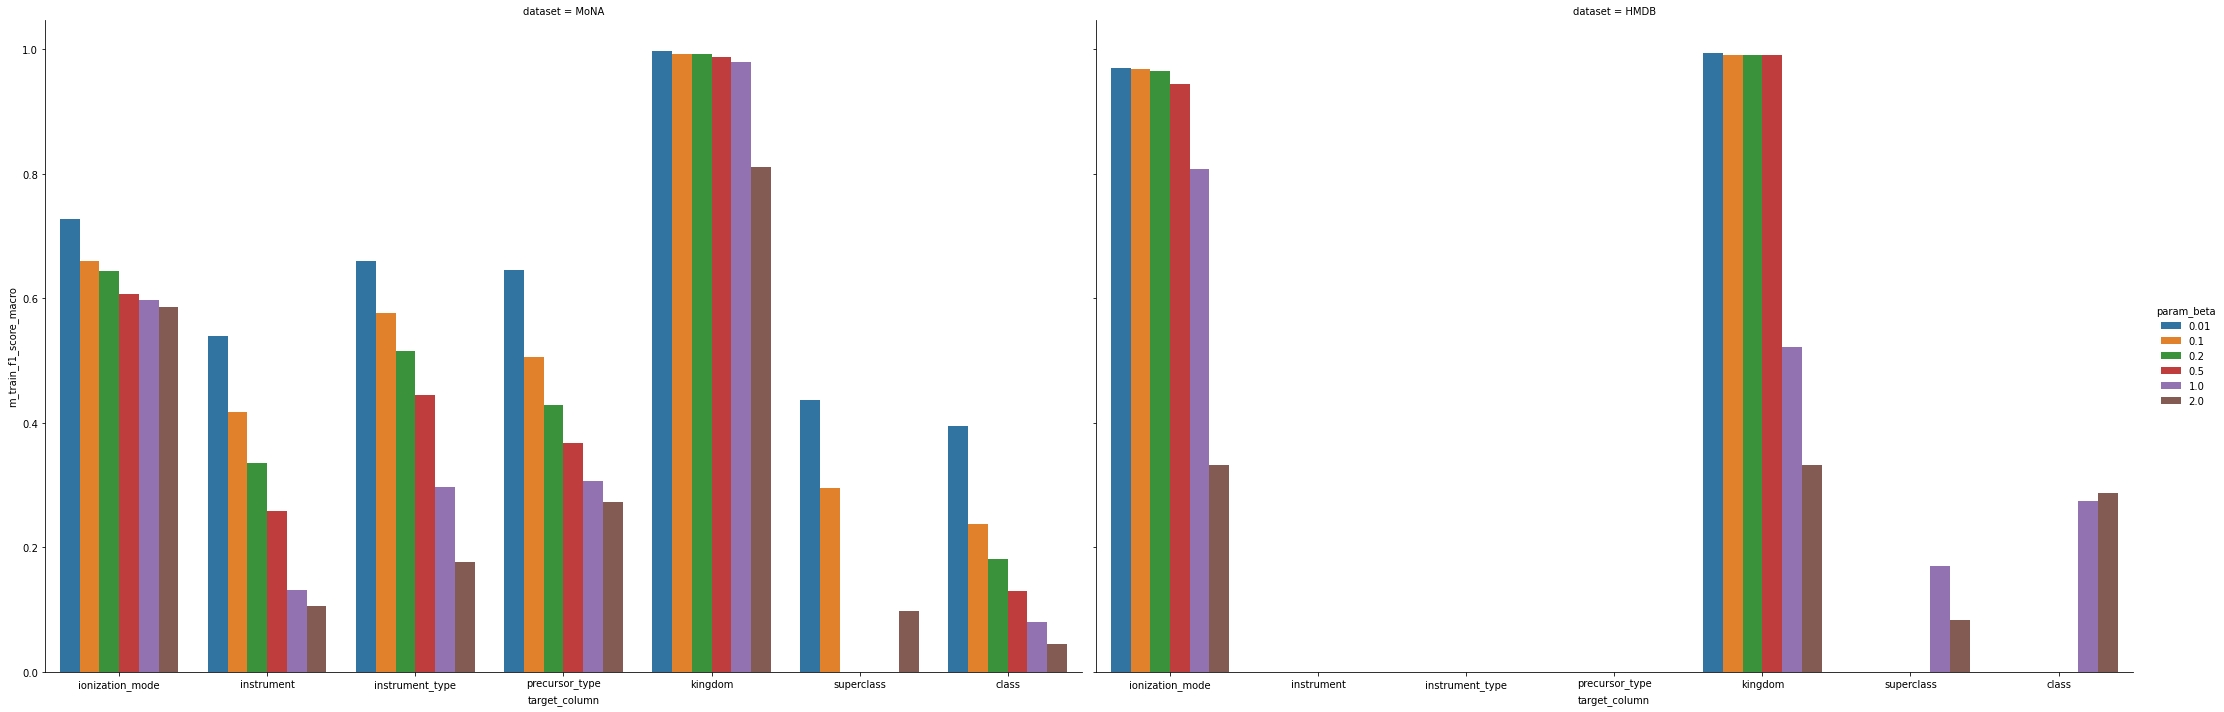

In [80]:
df_ = df[(df['name'] == 'betavae_clf_latent') & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False) & \
            (df['param_latent_dim'] == 20)
        ]
for column in clf_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column, col='dataset',
            hue="param_beta", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    plt.savefig(f'../.img/clf-latent-beta-{column}.svg')

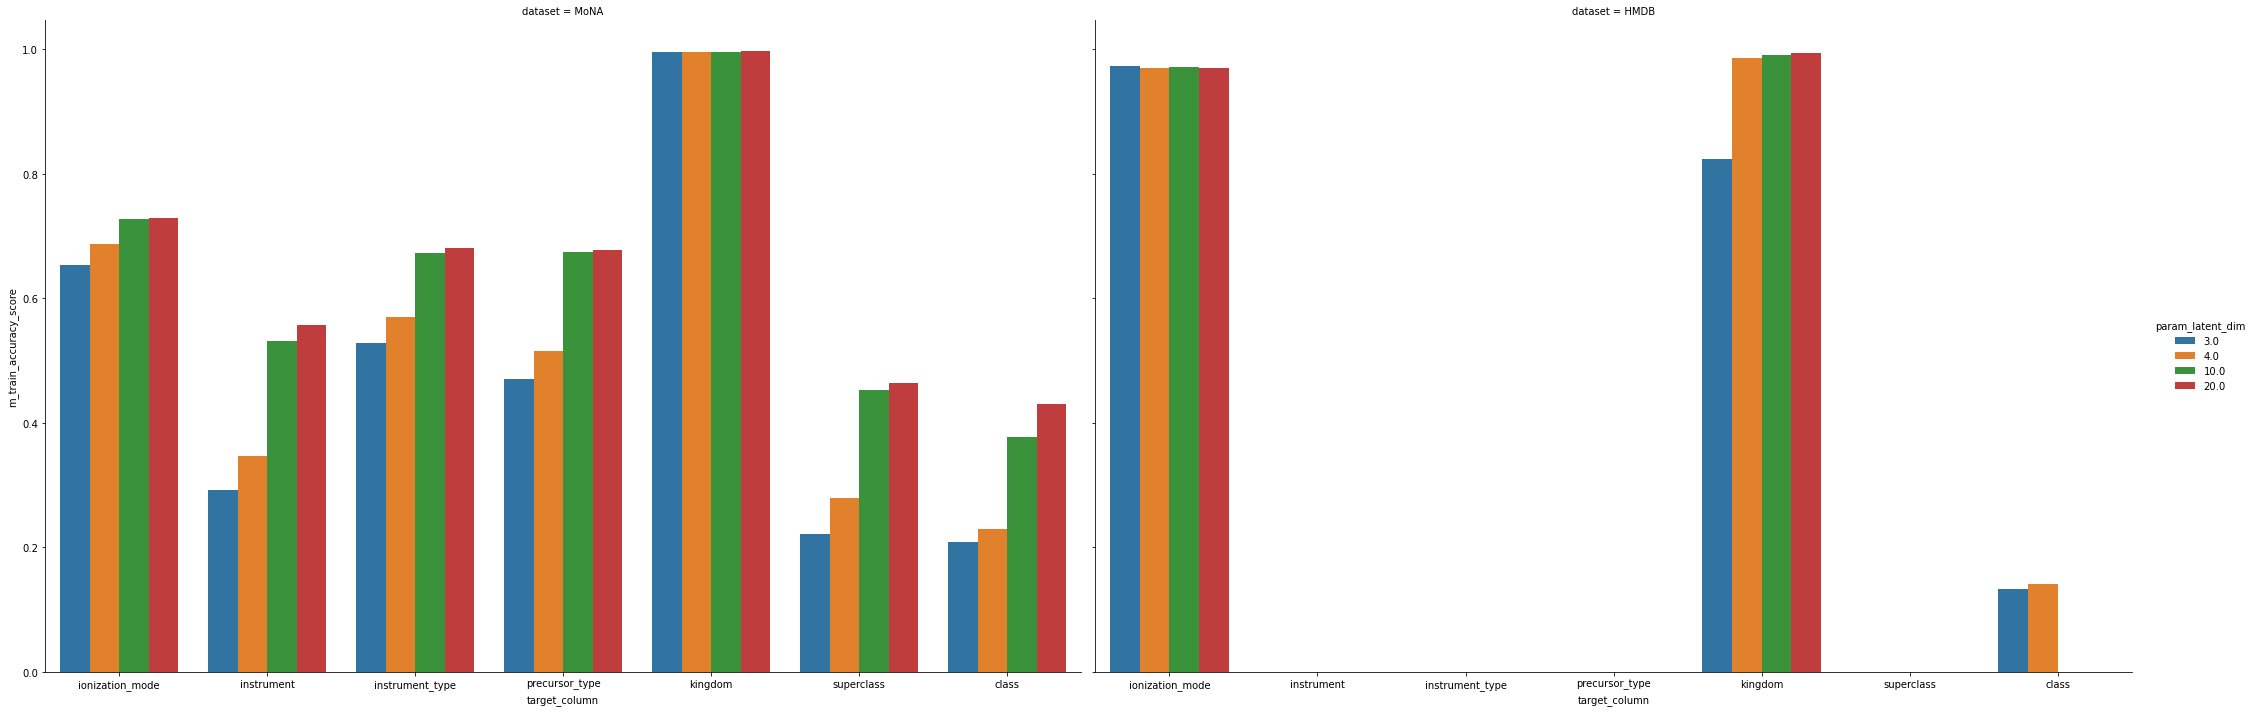

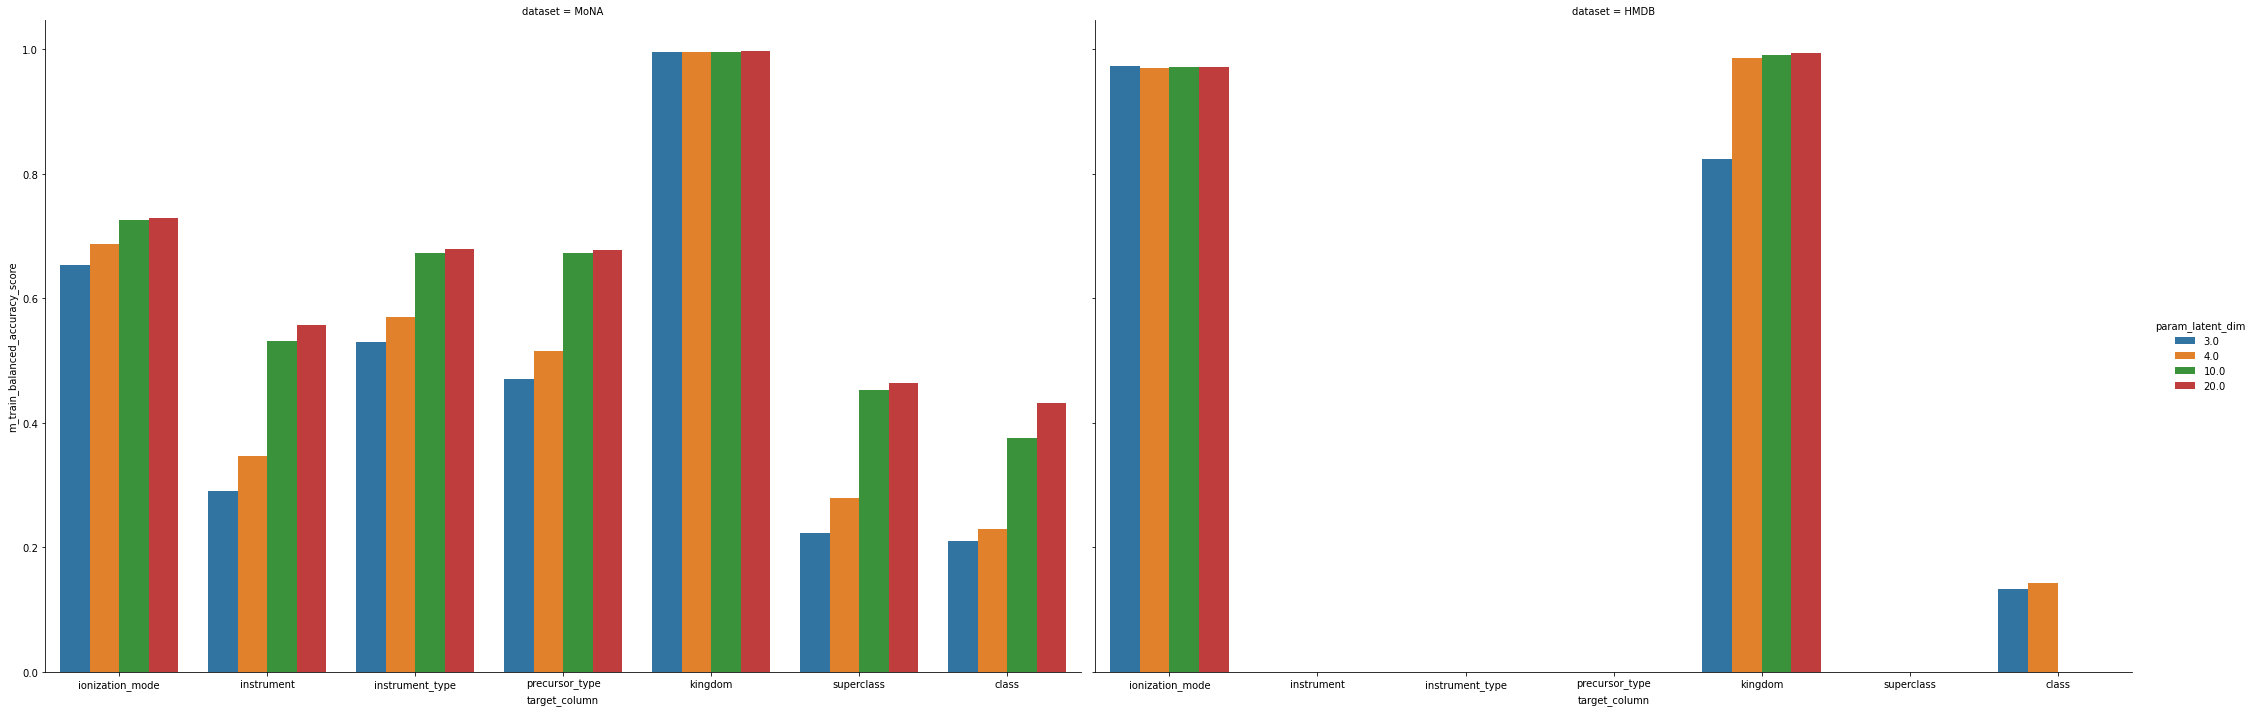

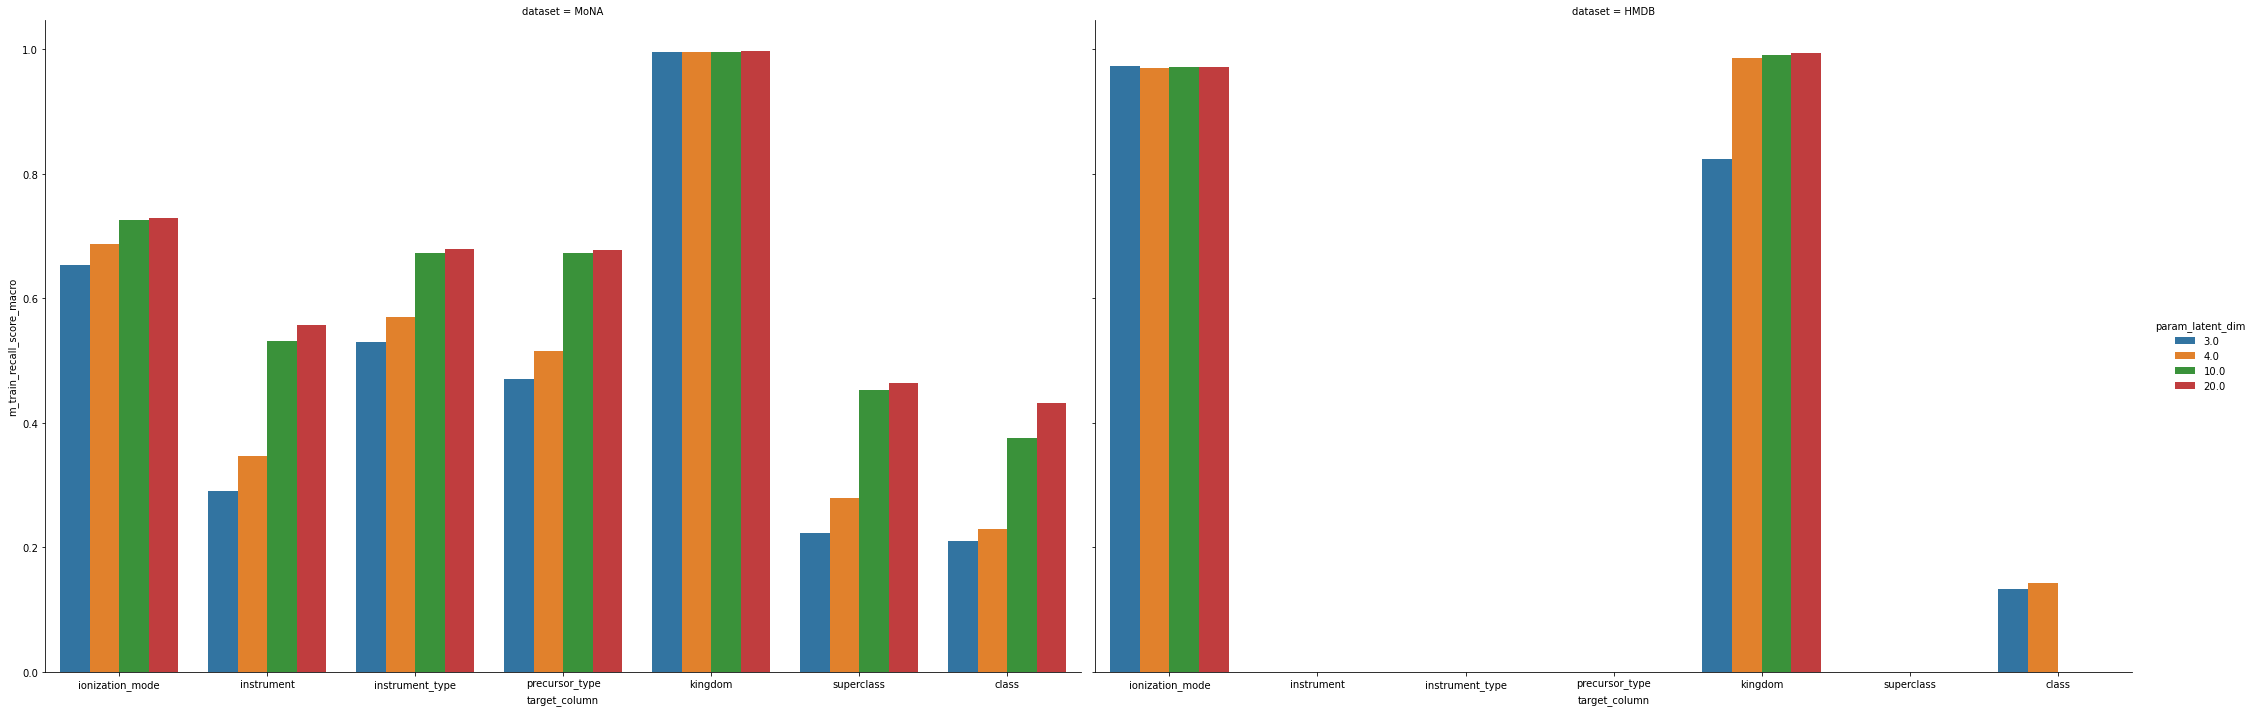

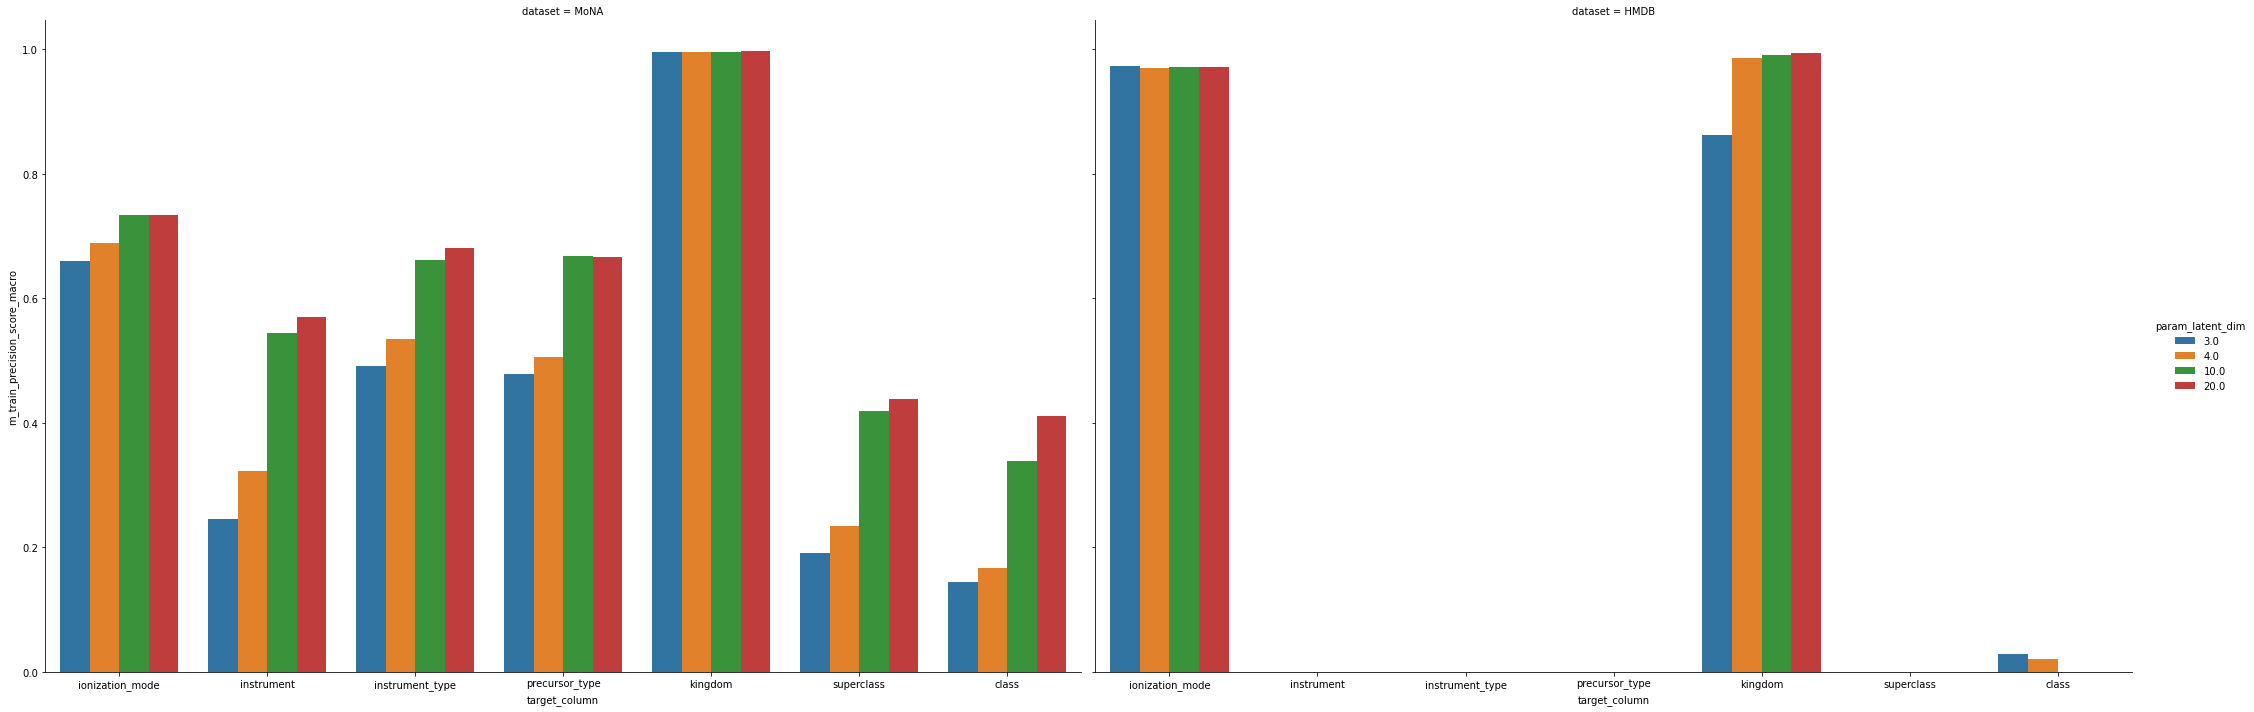

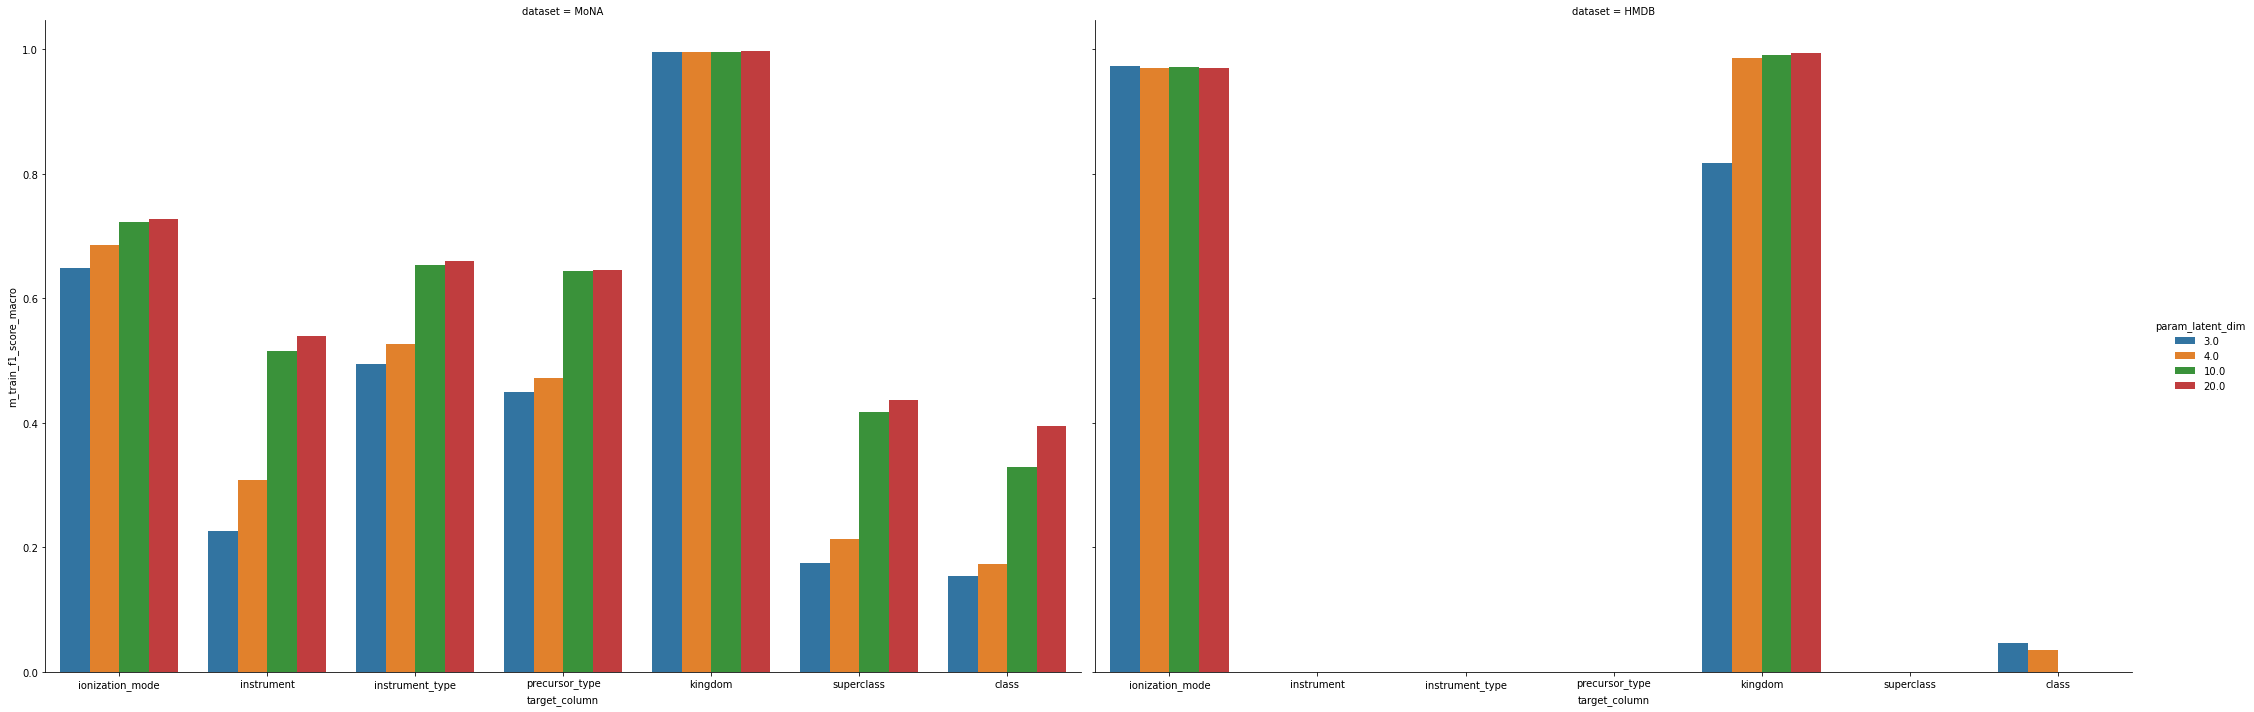

In [81]:
df_ = df[(df['name'] == 'betavae_clf_latent') & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False) & \
            (df['param_beta'] == 0.01)
        ]
for column in clf_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column, col='dataset',
            hue="param_latent_dim", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    plt.savefig(f'../.img/clf-latent-dim-{column}.svg')